## Imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import trade_module as t
%matplotlib inline



import datetime
from scipy.stats import linregress
from IPython.display import Image
from statistics import mean
import random

# Plot Imports
import matplotlib.pyplot as plt 
import matplotlib.dates as mpl_dates
import plotly.graph_objects as go
import datetime

pd.set_option("display.max_rows", None, "display.max_columns", None)

## Data Preparation
### Read Files and apply functions

In [2]:
#sd = '2007-01-02 00:00:00'
#ed = '2021-06-01 00:00:00'

#df_D1  = t.Read_prep_df( File = '../0. Data/EURUSD_D1.xlsx' , n = 0,     sd = sd, ed = ed, clean_sweep = 1, swing_max = 3, perc_95 = 10000) # per_75 = 577.2; per_95 = 990
#df_H4  = t.Read_prep_df( File = '../0. Data/EURUSD_H4.xlsx' , n = 0,     sd = sd, ed = ed, clean_sweep = 1, swing_max = 3, perc_95 = 480  ) # per_75 = 259.1; per_95 = 480
#df_H1  = t.Read_prep_df( File = '../0. Data/EURUSD_H1.xlsx' , n = 15000, sd = sd, ed = ed, clean_sweep = 1, swing_max = 3, perc_95 = 220  ) # per_75 = 126.6! per_95 = 220
#df_M15 = t.Read_prep_df( File = '../0. Data/EURUSD_M15.xlsx', n = 15000, sd = sd, ed = ed, clean_sweep = 1, swing_max = 3, perc_95 = 120  ) # per_75 = 81.8! per_95 = 120

### Merge dataframes - df

In [3]:
#df_D1_r   = t.Rename_df(df_D1,'D1')
#df_H4_r   = t.Rename_df(df_H4,'H4')
#df_H1_r   = t.Rename_df(df_H1,'H1')
#df_M15_r  = t.Rename_df(df_M15,'M15')

#df_H4_D1  = t.Merge_shift_df_H4_D1(df_H4_r,df_D1_r)
#df_H1_H4  = t.Merge_shift_df_H1_H4(df_H1_r,df_H4_D1)
#df_M15_H1 = t.Merge_shift_df_M15_H1(df_M15_r,df_H1_H4)

### MS_retracement- df

In [4]:
#t.MS_retracement(df_M15_H1)

### Price df

In [5]:
#dfv = t.Price_M15_H4(df_M15_H1 , k = 5000, ratio = 3, pip_min = 15, pip_max = 125, pip_over = -3)
#dfv = t.Price_M15_H1(dfv       , k = 1500, ratio = 3, pip_min = 15, pip_max = 60 , pip_over = -3)

### Save Dataframes

In [6]:
#df_D1    .to_pickle('df_D1_EURUSD.pkl')
#df_H4    .to_pickle('df_H4_EURUSD.pkl')
#df_H1    .to_pickle('df_H1_EURUSD.pkl')
#df_M15   .to_pickle('df_M15_EURUSD.pkl')
#df_M15_H1.to_pickle('df_M15_H1.pkl')
#dfv      .to_pickle('dfv_EURUSD.pkl')

## Load Raw Dataframes

In [7]:
df_D1     = pd.read_pickle('df_D1_EURUSD.pkl')
df_H4     = pd.read_pickle('df_H4_EURUSD.pkl')
df_H1     = pd.read_pickle('df_H1_EURUSD.pkl')
df_M15    = pd.read_pickle('df_M15_EURUSD.pkl')
#df_M15_H1 = pd.read_pickle('df_M15_H1.pkl')
dfv       = pd.read_pickle('dfv_EURUSD.pkl')

## Test Raw Data

In [8]:
# Test merge function
r, rge = random.randint(0, len(dfv)), 100
dfv.loc[r:r+rge,['Date_M15','Date_H1','Date_H4','Date_D1','Close_M15','Close_H1','Close_H4','Close_D1']]

Date_M15             Date_H1             Date_H4    Date_D1  \
89198 2010-07-26 07:15:00 2010-07-26 06:00:00 2010-07-26 00:00:00 2010-07-25   
89199 2010-07-26 07:30:00 2010-07-26 06:00:00 2010-07-26 00:00:00 2010-07-25   
89200 2010-07-26 07:45:00 2010-07-26 07:00:00 2010-07-26 04:00:00 2010-07-25   
89201 2010-07-26 08:00:00 2010-07-26 07:00:00 2010-07-26 04:00:00 2010-07-25   
89202 2010-07-26 08:15:00 2010-07-26 07:00:00 2010-07-26 04:00:00 2010-07-25   
89203 2010-07-26 08:30:00 2010-07-26 07:00:00 2010-07-26 04:00:00 2010-07-25   
89204 2010-07-26 08:45:00 2010-07-26 08:00:00 2010-07-26 04:00:00 2010-07-25   
89205 2010-07-26 09:00:00 2010-07-26 08:00:00 2010-07-26 04:00:00 2010-07-25   
89206 2010-07-26 09:15:00 2010-07-26 08:00:00 2010-07-26 04:00:00 2010-07-25   
89207 2010-07-26 09:30:00 2010-07-26 08:00:00 2010-07-26 04:00:00 2010-07-25   
89208 2010-07-26 09:45:00 2010-07-26 09:00:00 2010-07-26 04:00:00 2010-07-25   
89209 2010-07-26 10:00:00 2010-07-26 09:00:00 2010-07-26 04:00:00 2010-07-25   
89210 2010-07-26 10:15:00 2010-07-26 09:00:00 2010-07-26 04:00:00 2010-07-25   
89211 2010-07-26 10:30:00 2010-07-26 09:00:00 2010-07-26 04:00:00 2010-07-25   
89212 2010-07-26 10:45:00 2010-07-26 10:00:00 2010-07-26 04:00:00 2010-07-25   
89213 2010-07-26 11:00:00 2010-07-26 10:00:00 2010-07-26 04:00:00 2010-07-25   
89214 2010-07-26 11:15:00 2010-07-26 10:00:00 2010-07-26 04:00:00 2010-07-25   
89215 2010-07-26 11:30:00 2010-07-26 10:00:00 2010-07-26 04:00:00 2010-07-25   
89216 2010-07-26 11:45:00 2010-07-26 11:00:00 2010-07-26 08:00:00 2010-07-25   
89217 2010-07-26 12:00:00 2010-07-26 11:00:00 2010-07-26 08:00:00 2010-07-25   
89218 2010-07-26 12:15:00 2010-07-26 11:00:00 2010-07-26 08:00:00 2010-07-25   
89219 2010-07-26 12:30:00 2010-07-26 11:00:00 2010-07-26 08:00:00 2010-07-25   
89220 2010-07-26 12:45:00 2010-07-26 12:00:00 2010-07-26 08:00:00 2010-07-25   
89221 2010-07-26 13:00:00 2010-07-26 12:00:00 2010-07-26 08:00:00 2010-07-25   
89222 2010-07-26 13:15:00 2010-07-26 12:00:00 2010-07-26 08:00:00 2010-07-25   
89223 2010-07-26 13:30:00 2010-07-26 12:00:00 2010-07-26 08:00:00 2010-07-25   
89224 2010-07-26 13:45:00 2010-07-26 13:00:00 2010-07-26 08:00:00 2010-07-25   
89225 2010-07-26 14:00:00 2010-07-26 13:00:00 2010-07-26 08:00:00 2010-07-25   
89226 2010-07-26 14:15:00 2010-07-26 13:00:00 2010-07-26 08:00:00 2010-07-25   
89227 2010-07-26 14:30:00 2010-07-26 13:00:00 2010-07-26 08:00:00 2010-07-25   
89228 2010-07-26 14:45:00 2010-07-26 14:00:00 2010-07-26 08:00:00 2010-07-25   
89229 2010-07-26 15:00:00 2010-07-26 14:00:00 2010-07-26 08:00:00 2010-07-25   
89230 2010-07-26 15:15:00 2010-07-26 14:00:00 2010-07-26 08:00:00 2010-07-25   
89231 2010-07-26 15:30:00 2010-07-26 14:00:00 2010-07-26 08:00:00 2010-07-25   
89232 2010-07-26 15:45:00 2010-07-26 15:00:00 2010-07-26 12:00:00 2010-07-25   
89233 2010-07-26 16:00:00 2010-07-26 15:00:00 2010-07-26 12:00:00 2010-07-25   
89234 2010-07-26 16:15:00 2010-07-26 15:00:00 2010-07-26 12:00:00 2010-07-25   
89235 2010-07-26 16:30:00 2010-07-26 15:00:00 2010-07-26 12:00:00 2010-07-25   
89236 2010-07-26 16:45:00 2010-07-26 16:00:00 2010-07-26 12:00:00 2010-07-25   
89237 2010-07-26 17:00:00 2010-07-26 16:00:00 2010-07-26 12:00:00 2010-07-25   
89238 2010-07-26 17:15:00 2010-07-26 16:00:00 2010-07-26 12:00:00 2010-07-25   
89239 2010-07-26 17:30:00 2010-07-26 16:00:00 2010-07-26 12:00:00 2010-07-25   
89240 2010-07-26 17:45:00 2010-07-26 17:00:00 2010-07-26 12:00:00 2010-07-25   
89241 2010-07-26 18:00:00 2010-07-26 17:00:00 2010-07-26 12:00:00 2010-07-25   
89242 2010-07-26 18:15:00 2010-07-26 17:00:00 2010-07-26 12:00:00 2010-07-25   
89243 2010-07-26 18:30:00 2010-07-26 17:00:00 2010-07-26 12:00:00 2010-07-25   
89244 2010-07-26 18:45:00 2010-07-26 18:00:00 2010-07-26 12:00:00 2010-07-25   
89245 2010-07-26 19:00:00 2010-07-26 18:00:00 2010-07-26 12:00:00 2010-07-25   
89246 2010-07-26 19:15:00 2010-07-26 18:00:00 2010-07-26 12:00:00 2010-07-25   
89247 2010-07-26 

In [9]:
# Test Closing Function
r, rge = random.randint(0, len(dfv)), 20
dfv.loc[r:r+rge,['Open_M15','Close_M15','Closing_M15','Open_H1','Close_H1','Closing_H1','Open_H4','Close_H4','Closing_H4','Open_D1','Close_D1','Closing_D1']]

Open_M15  Close_M15  Closing_M15  Open_H1  Close_H1  Closing_H1  \
119344   1.34553    1.34459           -1  1.34396   1.34459         1.0   
119345   1.34460    1.34390           -1  1.34396   1.34459         1.0   
119346   1.34390    1.34461            1  1.34396   1.34459         1.0   
119347   1.34458    1.34431           -1  1.34396   1.34459         1.0   
119348   1.34430    1.34301           -1  1.34460   1.34301        -1.0   
119349   1.34299    1.34263           -1  1.34460   1.34301        -1.0   
119350   1.34264    1.34284            1  1.34460   1.34301        -1.0   
119351   1.34287    1.34227           -1  1.34460   1.34301        -1.0   
119352   1.34227    1.34241            1  1.34299   1.34241        -1.0   
119353   1.34243    1.34238           -1  1.34299   1.34241        -1.0   
119354   1.34237    1.34269            1  1.34299   1.34241        -1.0   
119355   1.34268    1.34260           -1  1.34299   1.34241        -1.0   
119356   1.34262    1.34375            1  1.34243   1.34375         1.0   
119357   1.34373    1.34308           -1  1.34243   1.34375         1.0   
119358   1.34307    1.34371            1  1.34243   1.34375         1.0   
119359   1.34371    1.34380            1  1.34243   1.34375         1.0   
119360   1.34380    1.34367           -1  1.34373   1.34367        -1.0   
119361   1.34369    1.34359           -1  1.34373   1.34367        -1.0   
119362   1.34356    1.34519            1  1.34373   1.34367        -1.0   
119363   1.34535    1.34828            1  1.34373   1.34367        -1.0   
119364   1.34829    1.34828           -1  1.34369   1.34828         1.0   

        Open_H4  Close_H4  Closing_H4  Open_D1  Close_D1  Closing_D1  
119344  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119345  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119346  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119347  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119348  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119349  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119350  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119351  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119352  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119353  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119354  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119355  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119356  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119357  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119358  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119359  1.34359   1.34459         1.0  1.33434   1.34265         1.0  
119360  1.34460   1.34367        -1.0  1.33434   1.34265         1.0  
119361  1.34460   1.34367        -1.0  1.33434   1.34265         1.0  
119362  1.34460   1.34367        -1.0  1.33434   1.34265         1.0  
119363  1.34460   1.34367        -1.0  1.33434   1.34265         1.0  
119364  1.34460   1.34367        -1.0  1.33434   1.34265         1.0

In [10]:
# Test Market Structure
r, rge = random.randint(0, len(df_M15)), 20
df_M15.loc[r:r+rge,['Open','High','Low','Close','MS_Sit','MS_H','MS_L']]

Open     High      Low    Close MS_Sit     MS_H     MS_L
302901  1.13251  1.13286  1.13249  1.13285     MS  1.13302  1.12949
302902  1.13286  1.13313  1.13274  1.13303     MS  1.13302  1.12949
302903  1.13303  1.13338  1.13300  1.13309     MS  1.13302  1.12949
302904  1.13309  1.13320  1.13280  1.13289     MS  1.13302  1.12949
302905  1.13289  1.13294  1.13247  1.13253     MS  1.13302  1.12949
302906  1.13253  1.13307  1.13250  1.13307     MS  1.13302  1.12949
302907  1.13307  1.13310  1.13270  1.13270     MS  1.13302  1.12949
302908  1.13270  1.13273  1.13205  1.13234     MS  1.13302  1.12949
302909  1.13235  1.13272  1.13227  1.13228     MS  1.13302  1.12949
302910  1.13227  1.13257  1.13214  1.13220     MS  1.13302  1.12949
302911  1.13219  1.13270  1.13218  1.13220     MS  1.13302  1.12949
302912  1.13219  1.13233  1.13196  1.13213     MS  1.13302  1.12949
302913  1.13213  1.13241  1.13205  1.13224     MS  1.13302  1.12949
302914  1.13224  1.13241  1.13213  1.13219     MS  1.13302  1.12949
302915  1.13218  1.13224  1.13153  1.13177     MS  1.13302  1.12949
302916  1.13177  1.13189  1.13126  1.13129     MS  1.13302  1.12949
302917  1.13128  1.13160  1.13121  1.13130     MS  1.13302  1.12949
302918  1.13130  1.13140  1.13045  1.13068     MS  1.13302  1.12949
302919  1.13068  1.13098  1.13047  1.13080     MS  1.13302  1.12949
302920  1.13080  1.13098  1.13071  1.13092     MS  1.13302  1.12949
302921  1.13092  1.13132  1.13088  1.13113     MS  1.13302  1.12949

In [11]:
# Test Trend & N_Breaks & MS_N
r, rge = random.randint(0, len(df_M15)), 200
df_M15[df_M15['MS_Sit'] != 'MS'].loc[r:r+rge,['MS_Sit','Trend','N_Breaks','MS_N']]

MS_Sit Trend  N_Breaks    MS_N
145259     Dw_Break  -1.0         2  6680.0
145272     Dw_Break  -1.0         3  6681.0
145273  Settling_Dw  -1.0         3  6681.0
145281     Dw_Break  -1.0         4  6682.0
145289     Dw_Break  -1.0         5  6683.0
145290  Settling_Dw  -1.0         5  6683.0
145316     Dw_Break  -1.0         6  6684.0
145317  Settling_Dw  -1.0         6  6684.0
145322     Dw_Break  -1.0         7  6685.0
145323  Settling_Dw  -1.0         7  6685.0
145324     Up_Break   1.0         1  6686.0
145330     Up_Break   1.0         2  6687.0
145331  Settling_Up   1.0         2  6687.0
145332  Settling_Up   1.0         2  6687.0
145333  Settling_Up   1.0         2  6687.0
145334  Settling_Up   1.0         2  6687.0
145339     Up_Break   1.0         3  6688.0
145349     Up_Break   1.0         4  6689.0
145361     Dw_Break  -1.0         1  6690.0
145372     Up_Break   1.0         1  6691.0
145386     Up_Break   1.0         2  6692.0

In [12]:
# Test MS_periods
r, rge = random.randint(0, len(df_M15)), 20
df_M15.loc[r:r+rge,['MS_Sit','MS_Pds']]

MS_Sit  MS_Pds
221370        MS     169
221371        MS     170
221372        MS     171
221373        MS     172
221374        MS     173
221375        MS     174
221376        MS     175
221377        MS     176
221378        MS     177
221379        MS     178
221380        MS     179
221381        MS     180
221382        MS     181
221383        MS     182
221384        MS     183
221385        MS     184
221386        MS     185
221387        MS     186
221388        MS     187
221389        MS     188
221390  Dw_Break       0

In [13]:
# Test MS_range
r, rge = random.randint(0, len(df_M15)), 20
df_M15.loc[r:r+rge,['MS_H','MS_L','MS_Sit','MS_range']]

MS_H     MS_L       MS_Sit  MS_range
256556  1.06402  1.06257     Dw_Break      14.5
256557  1.06402  1.06257           MS      14.5
256558  1.06402  1.06257           MS      14.5
256559  1.06324  1.06229     Dw_Break       9.5
256560  1.06324  1.06225  Settling_Dw       9.9
256561  1.06324  1.06225           MS       9.9
256562  1.06659  1.06225     Up_Break      43.4
256563  1.06659  1.06104     Dw_Break      55.5
256564  1.06659  1.06104           MS      55.5
256565  1.06659  1.06104           MS      55.5
256566  1.06659  1.06104           MS      55.5
256567  1.06659  1.06104           MS      55.5
256568  1.06659  1.06104           MS      55.5
256569  1.06659  1.06104           MS      55.5
256570  1.06659  1.06104           MS      55.5
256571  1.06659  1.06104           MS      55.5
256572  1.06659  1.06104           MS      55.5
256573  1.06659  1.06104           MS      55.5
256574  1.06659  1.06104           MS      55.5
256575  1.06659  1.06104           MS      55.5
256576  1.06659  1.06104           MS      55.5

In [14]:
# Test MS_retracement
r, rge = random.randint(0, len(dfv)), 20
dfv.loc[r:r+rge,['Date_M15','MS_L_M15','MS_H_M15','Close_M15','MS_Sit_M15','Trend_M15','MS_retracement_M15']]

Date_M15  MS_L_M15  MS_H_M15  Close_M15   MS_Sit_M15  \
337371 2020-07-07 05:15:00   1.12887   1.13454    1.13114           MS   
337372 2020-07-07 05:30:00   1.12887   1.13454    1.13050           MS   
337373 2020-07-07 05:45:00   1.12887   1.13454    1.13082           MS   
337374 2020-07-07 06:00:00   1.12887   1.13454    1.13010           MS   
337375 2020-07-07 06:15:00   1.12887   1.13454    1.13042           MS   
337376 2020-07-07 06:30:00   1.12887   1.13454    1.13021           MS   
337377 2020-07-07 06:45:00   1.12887   1.13454    1.12937           MS   
337378 2020-07-07 07:00:00   1.12887   1.13454    1.12902           MS   
337379 2020-07-07 07:15:00   1.12811   1.13086    1.12850     Dw_Break   
337380 2020-07-07 07:30:00   1.12811   1.13086    1.12865           MS   
337381 2020-07-07 07:45:00   1.12811   1.13086    1.12853           MS   
337382 2020-07-07 08:00:00   1.12811   1.13086    1.12841           MS   
337383 2020-07-07 08:15:00   1.12719   1.13086    1.12733     Dw_Break   
337384 2020-07-07 08:30:00   1.12719   1.13086    1.12751           MS   
337385 2020-07-07 08:45:00   1.12630   1.13086    1.12644     Dw_Break   
337386 2020-07-07 09:00:00   1.12588   1.13086    1.12661  Settling_Dw   
337387 2020-07-07 09:15:00   1.12588   1.13086    1.12655           MS   
337388 2020-07-07 09:30:00   1.12588   1.13086    1.12667           MS   
337389 2020-07-07 09:45:00   1.12588   1.13086    1.12736           MS   
337390 2020-07-07 10:00:00   1.12588   1.13086    1.12776           MS   
337391 2020-07-07 10:15:00   1.12588   1.13086    1.12766           MS   

       Trend_M15  MS_retracement_M15  
337371       1.0                60.0  
337372       1.0                71.3  
337373       1.0                65.6  
337374       1.0                78.3  
337375       1.0                72.7  
337376       1.0                76.4  
337377       1.0                91.2  
337378       1.0                97.4  
337379      -1.0                14.2  
337380      -1.0                19.6  
337381      -1.0                15.3  
337382      -1.0                10.9  
337383      -1.0                 3.8  
337384      -1.0                 8.7  
337385      -1.0                 3.1  
337386      -1.0                14.7  
337387      -1.0                13.5  
337388      -1.0                15.9  
337389      -1.0                29.7  
337390      -1.0                37.8  
337391      -1.0                35.7

In [15]:
# Test Price
r, rge = random.randint(0, len(dfv)), 50

dfv['Price_Lose'] = dfv['Price_M15'] + 0.0001 * dfv['S_Stop_Loss_M15_H1']
dfv['Price_Win'] = dfv['Price_M15'] - 0.0001 * dfv['S_Limit_M15_H1']
dfv.loc[r:r+rge,['High_M15','Low_M15','Close_M15','Price_M15','S_Stop_Loss_M15_H1','Price_Lose','S_Lose_Idx_M15_H1','S_Limit_M15_H1','Price_Win','S_Win_Idx_M15_H1','Labels_M15_H1']]

High_M15  Low_M15  Close_M15  Price_M15  S_Stop_Loss_M15_H1  \
136127   1.25322  1.25240    1.25246    1.25246                52.6   
136128   1.25272  1.25207    1.25207    1.25207                56.5   
136129   1.25240  1.25175    1.25183    1.25183                58.9   
136130   1.25266  1.25173    1.25265    1.25265                50.7   
136131   1.25280  1.25185    1.25214    1.25214                55.8   
136132   1.25246  1.25206    1.25237    1.25237                53.5   
136133   1.25257  1.25212    1.25225    1.25225                54.7   
136134   1.25263  1.25205    1.25243    1.25243                52.9   
136135   1.25245  1.25100    1.25117    1.25117                60.0   
136136   1.25157  1.25101    1.25138    1.25138                60.0   
136137   1.25153  1.24926    1.25028    1.25028                60.0   
136138   1.25061  1.24800    1.24848    1.24848                60.0   
136139   1.24928  1.24831    1.24905    1.24905                60.0   
136140   1.25014  1.24847    1.24981    1.24981                60.0   
136141   1.25011  1.24844    1.24968    1.24968                60.0   
136142   1.24975  1.24818    1.24862    1.24862                60.0   
136143   1.24967  1.24856    1.24915    1.24915                60.0   
136144   1.24958  1.24840    1.24888    1.24888                60.0   
136145   1.24898  1.24612    1.24726    1.24726                60.0   
136146   1.24758  1.24632    1.24636    1.24636                60.0   
136147   1.24635  1.24524    1.24581    1.24581                60.0   
136148   1.24680  1.24570    1.24618    1.24618                60.0   
136149   1.24669  1.24534    1.24600    1.24600                60.0   
136150   1.24691  1.24586    1.24684    1.24684                60.0   
136151   1.24837  1.24631    1.24780    1.24780                60.0   
136152   1.24850  1.24767    1.24770    1.24770                60.0   
136153   1.24812  1.24707    1.24752    1.24752                60.0   
136154   1.24750  1.24578    1.24601    1.24601                60.0   
136155   1.24638  1.24475    1.24570    1.24570                60.0   
136156   1.24636  1.24536    1.24581    1.24581                60.0   
136157   1.24614  1.24543    1.24577    1.24577                60.0   
136158   1.24625  1.24546    1.24600    1.24600                60.0   
136159   1.24667  1.24556    1.24646    1.24646                60.0   
136160   1.24717  1.24614    1.24636    1.24636                60.0   
136161   1.24759  1.24616    1.24674    1.24674                60.0   
136162   1.24688  1.24540    1.24549    1.24549                60.0   
136163   1.24675  1.24497    1.24537    1.24537                60.0   
136164   1.24560  1.24399    1.24469    1.24469                60.0   
136165   1.24591  1.24470    1.24529    1.24529                60.0   
136166   1.24631  1.24444    1.24452    1.24452                60.0   
136167   1.24546  1.24353    1.24500    1.24500                60.0   
136168   1.24541  1.24455    1.24539    1.24539                60.0   
136169   1.24673  1.24494    1.24634    1.24634                60.0   
136170   1.24682  1.24510    1.24558    1.24558                60.0   
136171   1.24595  1.24475    1.24593    1.24593                60.0   
136172   1.24732  1.24585    1.24650    1.24650                60.0   
136173   1.24805  1.24651    1.24736    1.24736                60.0   
136174   1.24827  1.24690    1.24766    1.24766                60.0   
136175   1.24932  1.24763    1.24866    1.24866                60.0   
136176   1.24929  1.24793    1.24812    1.24812                60.0   
136177   1.24827  1.24735    1.24786    1.24786                60.0   

        Price_Lose  S_Lose_Idx_M15_H1  S_Limit_M15_H1  Price_Win  \
136127     1.25772               69.0           157.8    1.23668   
136128     1.25772               68.0           169.5    1.23512   
136129     1.25772               67.0           176.7    1.23416   
136130     1.25772               66.0      

In [16]:
# Indicator - SMA
r, rge = random.randint(0, len(df_M15)), 20
df_M15.loc[r:r+rge,['Close','Close_im1','U_Move','D_Move','14_Avg_U','14_Avg_D','RSI_14_SMA']]

Close  Close_im1   U_Move   D_Move  14_Avg_U  14_Avg_D  RSI_14_SMA
59426  1.34570    1.34635      NaN  0.00065  0.000537  0.001183   31.234867
59427  1.34530    1.34570      NaN  0.00040  0.000586  0.001071   35.344828
59428  1.34530    1.34530      NaN      NaN  0.000617  0.001071   36.530324
59429  1.34315    1.34530      NaN  0.00215  0.000670  0.001206   35.709527
59430  1.34370    1.34315  0.00055      NaN  0.000650  0.001194   35.243997
59431  1.34395    1.34370  0.00025      NaN  0.000593  0.001375   30.127042
59432  1.34430    1.34395  0.00035      NaN  0.000636  0.001375   31.616341
59433  1.34330    1.34430      NaN  0.00100  0.000717  0.001321   35.163551
59434  1.34360    1.34330  0.00030      NaN  0.000657  0.001133   36.702128
59435  1.34300    1.34360      NaN  0.00060  0.000657  0.001150   36.363636
59436  1.34370    1.34300  0.00070      NaN  0.000639  0.001150   35.702875
59437  1.34430    1.34370  0.00060      NaN  0.000564  0.001150   32.916667
59438  1.34415    1.34430      NaN  0.00015  0.000458  0.001007   31.275386
59439  1.34340    1.34415      NaN  0.00075  0.000458  0.000814   36.014967
59440  1.34270    1.34340      NaN  0.00070  0.000458  0.000821   35.813953
59441  1.34330    1.34270  0.00060      NaN  0.000479  0.000892   34.926151
59442  1.34335    1.34330  0.00005      NaN  0.000425  0.000892   32.278481
59443  1.34400    1.34335  0.00065      NaN  0.000450  0.000640   41.284404
59444  1.34340    1.34400      NaN  0.00060  0.000438  0.000633   40.856031
59445  1.34380    1.34340  0.00040      NaN  0.000456  0.000633   41.873805
59446  1.34500    1.34380  0.00120      NaN  0.000563  0.000633   47.038328

In [17]:
# Indicator - EMA
r, rge = random.randint(0, len(df_M15)), 20
df_M15.loc[r:r+rge,['Close','Close_im1','U_Move','D_Move','14_Avg_U_EMA','14_Avg_D_EMA','RSI_14_EMA']]

Close  Close_im1   U_Move   D_Move  14_Avg_U_EMA  14_Avg_D_EMA  \
350164  1.21484    1.21473  0.00011      NaN      0.000249      0.000464   
350165  1.21454    1.21484      NaN  0.00030      0.000247      0.000479   
350166  1.21419    1.21454      NaN  0.00035      0.000239      0.000487   
350167  1.21390    1.21419      NaN  0.00029      0.000233      0.000496   
350168  1.21427    1.21390  0.00037      NaN      0.000230      0.000476   
350169  1.21419    1.21427      NaN  0.00008      0.000226      0.000453   
350170  1.21427    1.21419  0.00008      NaN      0.000215      0.000433   
350171  1.21473    1.21427  0.00046      NaN      0.000211      0.000405   
350172  1.21531    1.21473  0.00058      NaN      0.000214      0.000381   
350173  1.21508    1.21531      NaN  0.00023      0.000218      0.000361   
350174  1.21509    1.21508  0.00001      NaN      0.000217      0.000346   
350175  1.21555    1.21509  0.00046      NaN      0.000222      0.000333   
350176  1.21608    1.21555  0.00053      NaN      0.000232      0.000322   
350177  1.21579    1.21608      NaN  0.00029      0.000244      0.000313   
350178  1.21684    1.21579  0.00105      NaN      0.000271      0.000306   
350179  1.21655    1.21684      NaN  0.00029      0.000294      0.000299   
350180  1.21633    1.21655      NaN  0.00022      0.000314      0.000290   
350181  1.21547    1.21633      NaN  0.00086      0.000331      0.000295   
350182  1.21584    1.21547  0.00037      NaN      0.000346      0.000300   
350183  1.21629    1.21584  0.00045      NaN      0.000359      0.000310   
350184  1.21519    1.21629      NaN  0.00110      0.000376      0.000335   

        RSI_14_EMA  
350164   34.888029  
350165   34.028737  
350166   32.942275  
350167   31.933037  
350168   32.532016  
350169   33.271667  
350170   33.231638  
350171   34.239517  
350172   35.927693  
350173   37.632787  
350174   38.604347  
350175   39.973509  
350176   41.886097  
350177   43.831103  
350178   46.977028  
350179   49.560233  
350180   51.935279  
350181   52.833261  
350182   53.561384  
350183   53.629479  
350184   52.868070

In [18]:
# Indicator - MACD
r, rge = random.randint(0, len(df_M15)), 20
df_M15.loc[r:r+rge,['EMA_12_macd','EMA_26_macd','MACD_12_26','EMA_MACD_12_26_9','Hist_MACD_12_26_9','MACD_signal']]

EMA_12_macd  EMA_26_macd  MACD_12_26  EMA_MACD_12_26_9  \
28379     1.473753     1.472959    7.937634          9.520506   
28380     1.473706     1.472996    7.108003          9.038005   
28381     1.473682     1.473037    6.456776          8.521760   
28382     1.473634     1.473061    5.729384          7.963285   
28383     1.473700     1.473135    5.644626          7.499553   
28384     1.473738     1.473196    5.426144          7.084871   
28385     1.473774     1.473253    5.209087          6.709714   
28386     1.473790     1.473299    4.907870          6.349345   
28387     1.473824     1.473352    4.719648          6.023406   
28388     1.473786     1.473369    4.175375          5.653800   
28389     1.473742     1.473379    3.637550          5.250550   
28390     1.473701     1.473385    3.150792          4.830598   
28391     1.473705     1.473411    2.940930          4.452665   
28392     1.473621     1.473392    2.288292          4.019790   
28393     1.473546     1.473373    1.726958          3.561224   
28394     1.473423     1.473327    0.964351          3.041849   
28395     1.473309     1.473279    0.300037          2.493487   
28396     1.473235     1.473246   -0.104198          1.973950   
28397     1.473314     1.473283    0.314184          1.641997   
28398     1.473297     1.473277    0.199650          1.353527   
28399     1.473260     1.473261   -0.004041          1.082014   

       Hist_MACD_12_26_9  MACD_signal  
28379          -1.582872     3.008391  
28380          -1.930003     3.054947  
28381          -2.064983     3.985423  
28382          -2.233900     4.612967  
28383          -1.854927     4.143721  
28384          -1.658727     3.076817  
28385          -1.500627     2.489131  
28386          -1.441475     2.163117  
28387          -1.303758     1.879335  
28388          -1.478425     1.927508  
28389          -1.613000     2.384699  
28390          -1.679806     2.709527  
28391          -1.511735     2.539421  
28392          -1.731498     2.617565  
28393          -1.834266     3.176028  
28394          -2.077498     3.810684  
28395          -2.193450     4.556887  
28396          -2.078148     4.558312  
28397          -1.327812     2.759390  
28398          -1.153878     1.532133  
28399          -1.086055     1.253174

In [19]:
# Indicator - Bollinger Bands
r, rge = random.randint(0, len(df_M15)), 20
df_M15.loc[r:r+rge,['Close','Boll_SMA_20','Boll_SMA_20_Var_+2','Boll_SMA_20_Var_+2','Dist_BollB_SMA_20_Var_-2','Dist_BollB_SMA_20_Var_+2']]

Close  Boll_SMA_20  Boll_SMA_20_Var_+2  Boll_SMA_20_Var_+2  \
293951  1.14746     1.147417            1.148379            1.148379   
293952  1.14763     1.147451            1.148294            1.148294   
293953  1.14763     1.147469            1.148201            1.148201   
293954  1.14730     1.147490            1.148126            1.148126   
293955  1.14764     1.147486            1.148032            1.148032   
293956  1.14784     1.147465            1.147923            1.147923   
293957  1.14796     1.147474            1.147842            1.147842   
293958  1.14733     1.147452            1.147736            1.147736   
293959  1.14780     1.147464            1.147674            1.147674   
293960  1.14841     1.147495            1.147626            1.147626   
293961  1.14894     1.147625            1.147726            1.147726   
293962  1.14865     1.147731            1.147875            1.147875   
293963  1.14910     1.147871            1.148096            1.148096   
293964  1.14909     1.147965            1.148270            1.148270   
293965  1.14885     1.148046            1.148426            1.148426   
293966  1.14914     1.148083            1.148526            1.148526   
293967  1.14928     1.148124            1.148624            1.148624   
293968  1.14965     1.148228            1.148789            1.148789   
293969  1.14961     1.148339            1.148966            1.148966   
293970  1.14946     1.148438            1.149130            1.149130   
293971  1.14933     1.148532            1.149286            1.149286   

        Dist_BollB_SMA_20_Var_-2  Dist_BollB_SMA_20_Var_+2  
293951                -10.044589                 -9.194589  
293952                -10.219391                 -6.639391  
293953                 -8.936545                 -5.706545  
293954                 -4.447176                 -8.257176  
293955                 -7.002800                 -3.922800  
293956                 -8.321460                 -0.831460  
293957                 -8.530832                  1.179168  
293958                 -1.609412                 -4.059412  
293959                 -5.448332                  1.261668  
293960                -10.455792                  7.844208  
293961                -14.157522                 12.142478  
293962                -10.640146                  7.749854  
293963                -14.553323                 10.036677  
293964                -14.295254                  8.204746  
293965                -11.828198                  4.241802  
293966                -14.999563                  6.140437  
293967                -16.559182                  6.560818  
293968                -19.825946                  8.614054  
293969                -18.975723                  6.444277  
293970                -17.131518                  3.298482  
293971                -15.517004                  0.442996

## Clean Data

In [20]:
df  = t.clean_data(dfv)

No. columns BEFORE dropping: 167
No. columns AFTER dropping: 131
Length BEFORE removing None´s: 359753
Last row containing a None: 2494
Length AFTER removing None´s: 357259
Length BEFORE removing NaNs: 357259
Number rows containing NaNs: 673
Length AFTER removing NaNs: 356586
Length BEFORE removing Ouliars: 356586
Length AFTER removing Ouliars: 316669


## Explore Clean Data

### Plot Data

In [21]:
# Explores df_D1, df_H4, df_H1 or df_M15 data

r, rge = str(df_M15.loc[random.randint(0, len(df_M15)),'Date']), 100
t.plot_MS(df_M15, r, rge)

2010-10-28 19:45:00


In [22]:
# Explores df data

r, rge = '2007-11-12 14:30:00', 30

#r, rge = str(df.loc[random.randint(0, len(df)),'Date_M15']), 30
t.plot_MS_all(df, r, rge)

2007-11-12 13:00:00


### MS analysis

In [23]:
# Calculations
df_idx_M15 = t.MS_index_M15(df)
df_idx_H1  = t.MS_index_H1 (df)
df_idx_H4  = t.MS_index_H4 (df)
df_idx_D1  = t.MS_index_D1 (df)

N_df_M15_T_Up = sum(df.loc[df_idx_M15,'Trend_M15'] ==  1)
N_df_H1_T_Up  = sum(df.loc[df_idx_H1 ,'Trend_H1' ] ==  1)
N_df_H4_T_Up  = sum(df.loc[df_idx_H4 ,'Trend_H4' ] ==  1)
N_df_D1_T_Up  = sum(df.loc[df_idx_D1 ,'Trend_D1' ] ==  1)
N_df_M15_T_Dw = sum(df.loc[df_idx_M15,'Trend_M15'] == -1)
N_df_H1_T_Dw  = sum(df.loc[df_idx_H1 ,'Trend_H1' ] == -1)
N_df_H4_T_Dw  = sum(df.loc[df_idx_H4 ,'Trend_H4' ] == -1)
N_df_D1_T_Dw  = sum(df.loc[df_idx_D1 ,'Trend_D1' ] == -1)

N_df_B_pts_M15_H4 = df[df['Labelb_M15_H4'] == 1]['Date_M15'].count()
N_df_S_pts_M15_H4 = df[df['Labels_M15_H4'] == 1]['Date_M15'].count()
N_df_B_pts_M15_H1 = df[df['Labelb_M15_H1'] == 1]['Date_M15'].count()
N_df_S_pts_M15_H1 = df[df['Labels_M15_H1'] == 1]['Date_M15'].count()

l0 = df['MS_range_M15'].describe().to_list()
l0 = [round(x,1) for x in l0]
l1 = df['MS_range_H1'].describe().to_list()
l1 = [round(x,1) for x in l1]
l2 = df['MS_range_H4'].describe().to_list()
l2 = [round(x,1) for x in l2]
l3 = df['MS_range_D1'].describe().to_list()
l3 = [round(x,1) for x in l3]

# Prints
print('---- NUMBER OF BUYING AND SELLING POINTS for M15_H4 -----')
print('df : No. Buying  points (No. 1´s in [Labelb_M15_H4])',N_df_B_pts_M15_H4,'(',100*round(N_df_B_pts_M15_H4/len(df),3),'%)')
print('   : No. Selling points (No. 1´s in [Labels_M15_H4])',N_df_S_pts_M15_H4,'(',100*round(N_df_S_pts_M15_H4/len(df),3),'%)')

print('---- NUMBER OF BUYING AND SELLING POINTS for M15_H1 -----')
print('df : No. Buying  points (No. 1´s in [Labelb_M15_H1])',N_df_B_pts_M15_H1,'(',100*round(N_df_B_pts_M15_H1/len(df),3),'%)')
print('   : No. Selling points (No. 1´s in [Labels_M15_H1])',N_df_S_pts_M15_H1,'(',100*round(N_df_S_pts_M15_H1/len(df),3),'%)')

print('---- NUMBER OF Up & Dw TRENDS in MS STRUCTURES -----')
print('dfs: No. M15 MS´s trending (Up,Dw): (',N_df_M15_T_Up,N_df_M15_T_Dw,') of',len(df_idx_M15),'H1 MS´s')
print('dfs: No. H1  MS´s trending (Up,Dw): (',N_df_H1_T_Up,N_df_H1_T_Dw  ,') of',len(df_idx_H1),'H1 MS´s')
print('dfs: No. H4  MS´s trending (Up,Dw): (',N_df_H4_T_Up,N_df_H4_T_Dw  ,') of',len(df_idx_H4),'H4 MS´s')
print('dfs: No. D1  MS´s trending (Up,Dw): (',N_df_D1_T_Up,N_df_D1_T_Dw  ,') of',len(df_idx_D1),'D1 MS´s')

print('---- NUMBER OF MS STRUCTURES AFFECTED BY CORRECTIONS -----')
print(sum(df.loc[df_idx_H1,'MS_range_M15'] >= df['MS_range_M15'].max()),'MS´s of',len(df_idx_M15),'are affected from the MS function in M15')
print(sum(df.loc[df_idx_H1,'MS_range_H1']  >= df['MS_range_H1'].max()) ,'MS´s of',len(df_idx_H1) ,'are affected from the MS function in H1')
print(sum(df.loc[df_idx_H4,'MS_range_H4']  >= df['MS_range_H4'].max()) ,'MS´s of',len(df_idx_H4) ,'are affected from the MS function in H4')
print(sum(df.loc[df_idx_D1,'MS_range_D1']  >= df['MS_range_D1'].max()) ,'MS´s of',len(df_idx_D1) ,'are affected from the MS function in D1')

print('----- BUY - STOP LOSS LIMITATIONS M15_H4 -----')
print('df :   ',df  [df  ['B_Stop_Loss_M15_H4'] <= df['B_Stop_Loss_M15_H4'].min()].count()['Date_M15'],'are limited to',df['B_Stop_Loss_M15_H4'].min(),'pips out of',len(df))
print('df :   ',df  [df  ['B_Stop_Loss_M15_H4'] >= df['B_Stop_Loss_M15_H4'].max()].count()['Date_M15'],'are limited to',df['B_Stop_Loss_M15_H4'].max(),'pips out of',len(df))

print('----- SELL - STOP LOSS LIMITATIONS M15_H4 -----')
print('df :   ',df  [df  ['S_Stop_Loss_M15_H4'] <= df['S_Stop_Loss_M15_H4'].min()].count()['Date_M15'],'are limited to',df['S_Stop_Loss_M15_H4'].min(),'pips out of',len(df))
print('df :   ',df  [df  ['S_Stop_Loss_M15_H4'] >= df['S_Stop_Loss_M15_H4'].max()].count()['Date_M15'],'are limited to',df['S_Stop_Loss_M15_H4'].max(),'pips out of',len(df))

print('----- BUY - STOP LOSS LIMITATIONS M15_H1 -----')
print('df :   ',df  [df  ['B_Stop_Loss_M15_H1'] <= df['B_Stop_Loss_M15_H1'].min()].count()['Date_M15'],'are limited to',df['B_Stop_Loss_M15_H1'].min(),'pips out of',len(df))
print('df :   ',df  [df  ['B_Stop_Loss_M15_H1'] >= df['B_Stop_Loss_M15_H1'].max()].count()['Date_M15'],'are limited to',df['B_Stop_Loss_M15_H1'].max(),'pips out of',len(df))

print('----- SELL - STOP LOSS LIMITATIONS M15_H1 -----')
print('df :   ',df  [df  ['S_Stop_Loss_M15_H1'] <= df['S_Stop_Loss_M15_H1'].min()].count()['Date_M15'],'are limited to',df['S_Stop_Loss_M15_H1'].min(),'pips out of',len(df))
print('df :   ',df  [df  ['S_Stop_Loss_M15_H1'] >= df['S_Stop_Loss_M15_H1'].max()].count()['Date_M15'],'are limited to',df['S_Stop_Loss_M15_H1'].max(),'pips out of',len(df),'\n')

print('----- MS Range Stats -----')
print('MS_range_M15 mean:',l0[1],l0[3:])
print('MS_range_H1  mean:',l1[1],l1[3:])
print('MS_range_H4  mean:',l2[1],l2[3:])
print('MS_range_D1  mean:',l3[1],l3[3:])

---- NUMBER OF BUYING AND SELLING POINTS for M15_H4 -----
df : No. Buying  points (No. 1´s in [Labelb_M15_H4]) 80057 ( 25.3 %)
   : No. Selling points (No. 1´s in [Labels_M15_H4]) 70060 ( 22.1 %)
---- NUMBER OF BUYING AND SELLING POINTS for M15_H1 -----
df : No. Buying  points (No. 1´s in [Labelb_M15_H1]) 79977 ( 25.3 %)
   : No. Selling points (No. 1´s in [Labels_M15_H1]) 72217 ( 22.8 %)
---- NUMBER OF Up & Dw TRENDS in MS STRUCTURES -----
dfs: No. M15 MS´s trending (Up,Dw): ( 6221 6090 ) of 12311 H1 MS´s
dfs: No. H1  MS´s trending (Up,Dw): ( 1964 1959 ) of 3923 H1 MS´s
dfs: No. H4  MS´s trending (Up,Dw): ( 711 624 ) of 1335 H4 MS´s
dfs: No. D1  MS´s trending (Up,Dw): ( 125 134 ) of 259 D1 MS´s
---- NUMBER OF MS STRUCTURES AFFECTED BY CORRECTIONS -----
79 MS´s of 12311 are affected from the MS function in M15
58 MS´s of 3923 are affected from the MS function in H1
7 MS´s of 1335 are affected from the MS function in H4
1 MS´s of 259 are affected from the MS function in D1
----- BUY - S

### Label M15_H4
#### Full Manual Filtering Anaylisis

#### Solutions M15_H4

In [24]:
# Chosen Solution
t.Auto_Analysis(df, 30, 'M15_H4', 'print', 1, 1, 1, 1, -1, 1, -1, 1,0, 78.6, 23.6, 78.6, 0, 90, 0, 99, 0, 1200, 280, 10000, 0, 10000, 0, 10000)
df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1,0, 78.6, 23.6, 78.6, 0, 90, 0, 99, 0, 1200, 280, 10000, 0, 10000, 0, 10000)
print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/t.diff_month(df)),1),'%)')

TOTAL SCORE BUY  --- MEAN: 0.4  --- COUNT: 235.46
TOTAL SCORE SELL --- MEAN: 0.36  --- COUNT: 539.35
BUY VBLES   : ( 1 1 )( 1 1 )( -1 1 )( -1 1 )
SELL VBLES  : ( -1 -1 )( -1 -1 )( 1 -1 )( 1 -1 )
COMMON VBLES: ( 0 78.6 )( 23.6 78.6 )( 0 90 )( 0 99 )n( 0 1200 )o( 280 10000 )p( 0 10000 )q( 0 10000 )
BUY DFRAMES:
df1a 0.32 161.3  - df1b 0.32 162.03
df2a 0.31 250.27  - df2b 0.3 252.07
df3a 0.52 294.97  - df3b 0.52 292.1
Tot score:
mean: 0.4    count: 235.46
SELL DFRAMES:
df1a 0.48 245.63  - df1b 0.47 242.17
df2a 0.36 957.73  - df2b 0.36 953.27
df3a 0.3 417.13  - df3b 0.3 420.17
Tot score:
mean: 0.36    count: 539.35
Total months: 172 ,months w/ points: 58 ( 33.7 %)


In [25]:
#t.Auto_Analysis(df, 30, 'M15_H4', 'print', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 78.6, 23.6, 78.6, 0, 99, 0, 99, 0, 700, 270, 10000, 0, 10000, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 78.6, 23.6, 78.6, 0, 99, 0, 99, 0, 700, 270, 10000, 0, 10000, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/t.diff_month(df)),1),'%)')

In [26]:
#t.Auto_Analysis(df, 30, 'M15_H4', 'print', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 90, 23.6, 78.6, 0, 90, 0, 99, 0, 700, 270, 10000, 0, 10000, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 90, 23.6, 78.6, 0, 90, 0, 99, 0, 700, 270, 10000, 0, 10000, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/t.diff_month(df)),1),'%)')

In [27]:
#t.Auto_Analysis(df, 30, 'M15_H4', 'print', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 90, 23.6, 90, 23.6, 99, 0, 99, 0, 700, 270, 10000, 0, 10000, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 90, 23.6, 90, 23.6, 99, 0, 99, 0, 700, 270, 10000, 0, 10000, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/t.diff_month(df)),1),'%)')

In [28]:
#t.Auto_Analysis(df, 30, 'M15_H4', 'print', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 78.6, 0, 78.6, 0, 99, 0, 99, 0, 1400, 280, 10000, 0, 10000, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 78.6, 0, 78.6, 0, 99, 0, 99, 0, 1400, 280, 10000, 0, 10000, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/t.diff_month(df)),1),'%)')

In [29]:
#t.Auto_Analysis(df, 30, 'M15_H4', 'print', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 90, 0, 78.6, 0, 90, 0, 99, 0, 800, 280, 10000, 0, 10000, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1, 23.6, 90, 0, 78.6, 0, 90, 0, 99, 0, 800, 280, 10000, 0, 10000, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/t.diff_month(df)),1),'%)')

### Label_M15_H1
#### Full Manual Filtering Anaylisis

#### Solutions M15_H1

In [30]:
# CHOSEN
t.Auto_Analysis(df, 30, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 200, 0, 10000)
df_b, df_s = t.Auto_Analysis(df, 30, 'M15_H1', 'ret', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 200, 0, 10000)
print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/t.diff_month(df)),1),'%)')

TOTAL SCORE BUY  --- MEAN: 0.37  --- COUNT: 74.32
TOTAL SCORE SELL --- MEAN: 0.36  --- COUNT: 60.2
BUY VBLES   : ( -1 1 )( -1 1 )( 1 1 )( -1 1 )
SELL VBLES  : ( 1 -1 )( 1 -1 )( -1 -1 )( 1 -1 )
COMMON VBLES: ( 38.6 50 )( 23.6 61.8 )( 0 78.6 )( 38.6 61.8 )n( 0 1900 )o( 0 400 )p( 0 200 )q( 0 10000 )
BUY DFRAMES:
df1a 0.33 93.87  - df1b 0.33 92.43
df2a 0.4 83.03  - df2b 0.4 82.1
df3a 0.41 47.7  - df3b 0.39 46.8
Tot score:
mean: 0.37    count: 74.32
SELL DFRAMES:
df1a 0.36 84.27  - df1b 0.37 86.73
df2a 0.36 65.47  - df2b 0.37 66.17
df3a 0.34 29.83  - df3b 0.36 28.73
Tot score:
mean: 0.36    count: 60.2
Total months: 172 ,months w/ points: 120 ( 69.8 %)


In [31]:
# BRUTAL - DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H1', 'ret', -1, 1, -1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 1900, 0, 400, 0, 180, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/diff_month(df)),1),'%)')

In [32]:
# BRUTAL 2 - DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 61.8,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H1', 'ret', -1, 1, -1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 1900, 0, 400, 0, 180, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/diff_month(df)),1),'%)')

In [33]:
# BRUTAL 3 - RCF WORKS ON BUY - NOT ON SELL df2
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)
#df_b, df_s = t.Auto_Analysis(df, 50, 'M15_H1', 'ret', -1, 1, -1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 1900, 0, 400, 0, 180, 0, 10000)
#print('Total months:',t.diff_month(df),',months w/ points:',t.N_months_concat(df_b, df_s),'(',round(100*(t.N_months_concat(df_b, df_s)/diff_month(df)),1),'%)')

In [34]:
# RCF WORKS ON BUY - ALMOST ON SELL df2
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [35]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 2200, 0, 400, 0, 180, 0, 10000)

In [36]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1700, 0, 400, 0, 180, 0, 10000)

In [37]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 380, 0, 180, 0, 10000)

In [38]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 420, 0, 180, 0, 10000)

In [39]:
# RCF NOT WORKING
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 160, 0, 10000)

In [40]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 10, 180, 0, 10000)

In [41]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 20, 400, 0, 180, 0, 10000)

In [42]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 78.6, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [43]:
# DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 90,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [44]:
# DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  23.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [45]:
# DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 78.6, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [46]:
# DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 70, 0, 78.6,  38.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)

In [47]:
# Brutal
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 70, 0, 78.6,  38.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)

In [48]:
# Brutal
#Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 78.6, 0, 78.6,  38.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)

In [49]:
# BRUTAL 4 # DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 90,  38.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)

In [50]:
# DOES NOT WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  23.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)

In [51]:
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 78.6, 0, 90,  38.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)

In [52]:
#RFC DIDN T WORK
#t.Auto_Analysis(df, 50, 'M15_H1', 'print', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 90,  23.6, 61.8, 0, 10000, 0, 400, 0, 180, 0, 10000)

In [53]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, -1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [54]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, -1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [55]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, -1, 1, -1, 1, 1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [56]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [57]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [58]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            1, 1, -1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [59]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, -1, 1, -1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 23.6, 61.8,  38.6, 50, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [60]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 23.6, 90, 0, 99, 38.6, 61.8,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [61]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 50, 38.6, 61.8,  23.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [62]:
# GOOOOD
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 50, 38.6, 61.8,  38.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [63]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  0, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [64]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',             -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  23.6, 50, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [65]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',             -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  23.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [66]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [67]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, -1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [68]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, -1, 1, 1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [69]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, -1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  38.6, 61.8, 0, 1900, 0, 400, 0, 180, 0, 10000)

In [70]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',             -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 61.8, 38.6, 61.8,  38.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [71]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',             -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 78.6, 38.6, 61.8,  0, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [72]:
# GOOOOD ++++ # DOES NOT WORK
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 78.6, 38.6, 61.8,  23.6, 61.8, 0, 2100, 0, 460, 0, 10000, 0, 10000)

In [73]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, -1, 1, 1, 1, 38.6, 61.8, 0, 78.6, 50, 61.8,  23.6, 61.8, 0, 2100, 0, 460, 0, 10000, 0, 10000)

In [74]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',             -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 78.6, 38.6, 61.8,  23.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [75]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',             -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 78.6, 38.6, 61.8,  38.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [76]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',             -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 90, 38.6, 61.8,  38.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [77]:
# GOOD
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 99, 38.6, 61.8,  23.6, 61.8, 0, 1900, 0, 450, 0, 10000, 0, 10000)

In [78]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 99, 38.6, 61.8,  0, 61.8, 0, 2500, 50, 350, 25, 220, 15, 119)

In [79]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 99, 38.6, 61.8,  0, 78.6, 0, 2800, 0, 350, 50, 220, 20, 120)

In [80]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 99, 38.6, 61.8,  23.6, 99, 0, 1600, 50, 450, 0, 210, 20, 119)

In [81]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, 1, 1, 1, 1, 38.6, 61.8, 0, 99, 38.6, 61.8,  38.6, 61.8, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [82]:
#t.Auto_Analysis(df, 100, 'M15_H1', 'print',            -1, 1, 1, 1, -1, 1, 1, 1, 38.2, 90, 23.6, 78.6, 50, 61.8, 23.6, 78.6, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [83]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, -1, 1, 1, 1, 38.2, 90, 23.6, 78.6, 50, 61.8, 38.2, 99, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [84]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',            -1, 1, 1, 1, -1, 1, 1, 1, 38.2, 90, 23.6, 78.6, 50, 78.6, 38.2, 90, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [85]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',-1, 1, 1, 1, -1, 1, 1, 1, 38.2, 90, 23.6, 90, 50, 61.8, 38.2, 99, 0, 10000, 0, 10000, 0, 10000, 0, 10000)

In [86]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print',-1, 1, 1, 1, -1, 1, 1, 1, 38.2, 90, 23.6, 99, 50, 61.8, 38.2, 78.6, 0, 1300, 0, 10000, 25, 10000, 0, 10000)

In [87]:
#t.Auto_Analysis(df, 30, 'M15_H1', 'print', -1, 1, 1, 1, 1, 1, 1, 1, 38.2, 90, 23.6, 99, 50, 61.8, 38.2, 78.6, 0, 1000, 0, 10000, 0, 10000, 25, 10000)

### Prepare the data

In [88]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

# Read, clean and split the df in 3 for H1_b, H1_s, H1_H4_b, H1_H4_s

dfv = pd.read_pickle('dfv_EURUSD.pkl')
df = t.clean_data(dfv)

No. columns BEFORE dropping: 165
No. columns AFTER dropping: 129
Length BEFORE removing None´s: 359753
Last row containing a None: 2494
Length AFTER removing None´s: 357259
Length BEFORE removing NaNs: 357259
Number rows containing NaNs: 673
Length AFTER removing NaNs: 356586
Length BEFORE removing Ouliars: 356586
Length AFTER removing Ouliars: 316669


### Explore and drop corralated data

In [89]:
ind_cols =  ['RSI_14_SMA_H1', 'RSI_14_EMA_H1', 'EMA_12_macd_H1', 'EMA_26_macd_H1',
             'MACD_12_26_H1', 'EMA_MACD_12_26_9_H1', 'Hist_MACD_12_26_9_H1', 'MACD_signal_H1', 
             'Boll_SMA_20_H1', 'Boll_SMA_20_Var_-2_H1', 'Boll_SMA_20_Var_+2_H1', 'Dist_BollB_SMA_20_Var_+2_H1', 
             'Dist_BollB_SMA_20_Var_-2_H1', 'BollB_Wideness_H1',
             'RSI_14_SMA_H4', 'RSI_14_EMA_H4', 'EMA_12_macd_H4', 'EMA_26_macd_H4',
             'MACD_12_26_H4', 'EMA_MACD_12_26_9_H4', 'Hist_MACD_12_26_9_H4', 'MACD_signal_H4', 
             'Boll_SMA_20_H4', 'Boll_SMA_20_Var_-2_H4', 'Boll_SMA_20_Var_+2_H4', 'Dist_BollB_SMA_20_Var_+2_H4', 
             'Dist_BollB_SMA_20_Var_-2_H4', 'BollB_Wideness_H4',
             'RSI_14_SMA_D1', 'RSI_14_EMA_D1', 'EMA_12_macd_D1', 'EMA_26_macd_D1',
             'MACD_12_26_D1', 'EMA_MACD_12_26_9_D1', 'Hist_MACD_12_26_9_D1', 'MACD_signal_D1', 
             'Boll_SMA_20_D1', 'Boll_SMA_20_Var_-2_D1', 'Boll_SMA_20_Var_+2_D1', 'Dist_BollB_SMA_20_Var_+2_D1', 
             'Dist_BollB_SMA_20_Var_-2_D1', 'BollB_Wideness_D1']

print("Top Absolute Correlations")
print(t.get_top_abs_correlations(df[ind_cols], 150))

Top Absolute Correlations
EMA_26_macd_H1               Boll_SMA_20_H1                 0.999979
EMA_12_macd_H1               Boll_SMA_20_H1                 0.999951
                             EMA_26_macd_H1                 0.999945
EMA_26_macd_H1               EMA_12_macd_H4                 0.999933
EMA_26_macd_H4               Boll_SMA_20_H4                 0.999915
Boll_SMA_20_H1               Boll_SMA_20_Var_+2_H1          0.999910
                             Boll_SMA_20_Var_-2_H1          0.999909
EMA_26_macd_H1               Boll_SMA_20_Var_+2_H1          0.999891
                             Boll_SMA_20_Var_-2_H1          0.999888
EMA_12_macd_H1               Boll_SMA_20_Var_-2_H1          0.999864
Boll_SMA_20_H1               EMA_12_macd_H4                 0.999862
EMA_12_macd_H1               Boll_SMA_20_Var_+2_H1          0.999858
EMA_12_macd_H4               Boll_SMA_20_H4                 0.999792
Boll_SMA_20_Var_+2_H1        EMA_12_macd_H4                 0.999777
EMA_12_m

In [90]:
#Corrolated columns that need dropping

corr_cols = t.remove_corr(df, ind_cols, 0.98)

print("Top Absolute Correlations")
print(t.get_top_abs_correlations(df[list(set(ind_cols)-set(corr_cols))], 300))

Top Absolute Correlations
EMA_MACD_12_26_9_H1          MACD_12_26_H1                  0.956096
EMA_MACD_12_26_9_H4          MACD_12_26_H4                  0.955613
EMA_MACD_12_26_9_D1          MACD_12_26_D1                  0.952996
Hist_MACD_12_26_9_H4         EMA_MACD_12_26_9_H1            0.855010
                             MACD_12_26_H1                  0.811144
Hist_MACD_12_26_9_D1         EMA_MACD_12_26_9_H4            0.804387
EMA_MACD_12_26_9_H1          Dist_BollB_SMA_20_Var_-2_H4    0.798131
Dist_BollB_SMA_20_Var_+2_H4  EMA_MACD_12_26_9_H1            0.796344
                             MACD_12_26_H1                  0.784017
Dist_BollB_SMA_20_Var_-2_H4  MACD_12_26_H1                  0.783642
RSI_14_EMA_H4                RSI_14_SMA_H4                  0.780373
RSI_14_EMA_D1                RSI_14_SMA_D1                  0.779508
Dist_BollB_SMA_20_Var_-2_D1  EMA_MACD_12_26_9_H4            0.764154
RSI_14_SMA_H1                RSI_14_EMA_H1                  0.757535
EMA_MACD

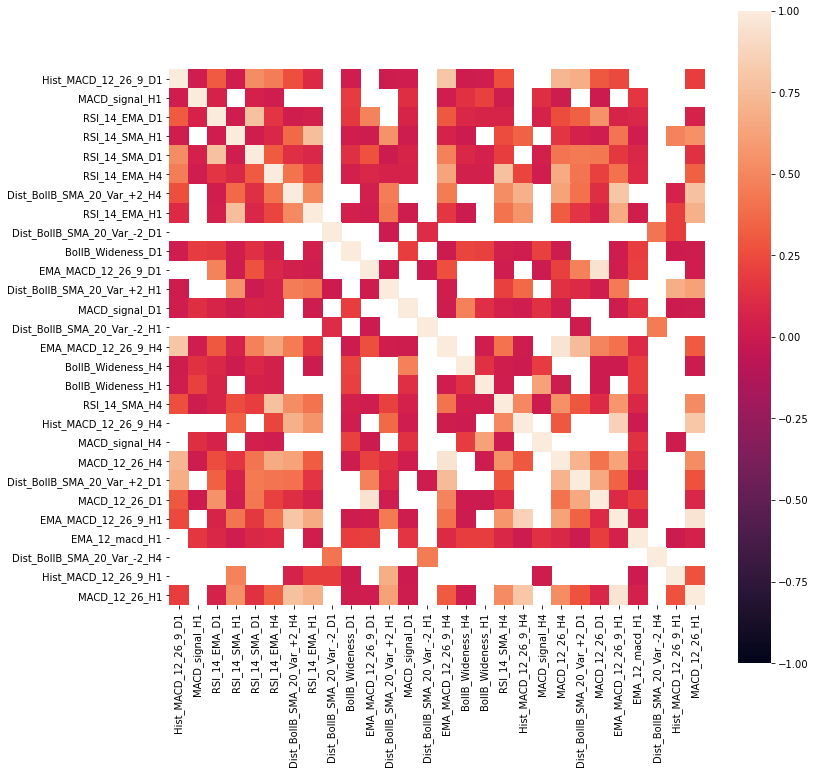

In [91]:
# Plot correlations between columns

import seaborn as sns
import matplotlib.pyplot as plt

ind_cols = list(set(ind_cols)-set(corr_cols))

df_corr = df[ind_cols].corr().round(2)

kot = df_corr[df_corr>=.0]
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(kot, vmin=-1, vmax=1, square=1)

In [92]:
# Drop correlated columns

#df.drop(corr_cols, axis = 1, inplace = True)

### Filtration process

In [93]:
# Split the Data in 3 dfs

df3, df2, df1 = t.split3_dfs(df)

In [94]:
# Create filtered dataframes for M15_H1
df1_filt_b_M15_H1, df1_filt_s_M15_H1 = t.Auto_Analysis(df1, 50, 'M15_H1', 'ret', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 200, 0, 10000)
df2_filt_b_M15_H1, df2_filt_s_M15_H1 = t.Auto_Analysis(df2, 50, 'M15_H1', 'ret', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 200, 0, 10000)
df3_filt_b_M15_H1, df3_filt_s_M15_H1 = t.Auto_Analysis(df3, 50, 'M15_H1', 'ret', -1, 1, -1, 1, 1, 1, -1, 1, 38.6, 50, 23.6, 61.8, 0, 78.6,  38.6, 61.8, 0, 1900, 0, 400, 0, 200, 0, 10000)

b_tot  = df1_filt_b_M15_H1.shape[0] + df2_filt_b_M15_H1.shape[0] + df3_filt_b_M15_H1.shape[0]
s_tot  = df1_filt_s_M15_H1.shape[0] + df2_filt_s_M15_H1.shape[0] + df3_filt_s_M15_H1.shape[0]
b_perc = (df1_filt_b_M15_H1[df1_filt_b_M15_H1['Labelb_M15_H1'] == 1].count()[0] + df2_filt_b_M15_H1[df2_filt_b_M15_H1['Labelb_M15_H1'] == 1].count()[0] + df3_filt_b_M15_H1[df3_filt_b_M15_H1['Labelb_M15_H1'] == 1].count()[0])/b_tot
s_perc = (df1_filt_s_M15_H1[df1_filt_s_M15_H1['Labelb_M15_H1'] == 1].count()[0] + df2_filt_s_M15_H1[df2_filt_s_M15_H1['Labels_M15_H1'] == 1].count()[0] + df3_filt_s_M15_H1[df3_filt_s_M15_H1['Labels_M15_H1'] == 1].count()[0])/s_tot

print('M15_H1 BUY   Shapes df1, df2, df3: ',df1_filt_b_M15_H1.shape,df2_filt_b_M15_H1.shape,df3_filt_b_M15_H1.shape)
print('M15_H1 BUY   Total:',b_tot,'points')
print('M15_H1 BUY   Overall performance:',round(100 * b_perc,2),'%\n')
print('M15_H1 SELL  Shapes df1, df2, df3: ',df1_filt_s_M15_H1.shape,df2_filt_s_M15_H1.shape,df3_filt_s_M15_H1.shape)
print('M15_H1 SELL  Total:',s_tot,'points')
print('M15_H1 SELL  Overall performance:',round(100 * s_perc,2),'%\n')
print('TOTAL POINTS:',b_tot + s_tot,'of',len(df),'(',round(100*(b_tot + s_tot)/len(df),2),'%)')
print('TOTAL PERFORMANCE:',round((100 * (((b_perc*b_tot) + (s_perc*s_tot))/(b_tot+s_tot))),2),'%\n\n')

# Create filtered dataframes for M15_H4
df1_filt_b_M15_H4, df1_filt_s_M15_H4 = t.Auto_Analysis(df1, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1,0, 78.6, 23.6, 78.6, 0, 90, 0, 99, 0, 1200, 280, 10000, 0, 10000, 0, 10000)
df2_filt_b_M15_H4, df2_filt_s_M15_H4 = t.Auto_Analysis(df2, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1,0, 78.6, 23.6, 78.6, 0, 90, 0, 99, 0, 1200, 280, 10000, 0, 10000, 0, 10000)
df3_filt_b_M15_H4, df3_filt_s_M15_H4 = t.Auto_Analysis(df3, 50, 'M15_H4', 'ret', 1, 1, 1, 1, -1, 1, -1, 1,0, 78.6, 23.6, 78.6, 0, 90, 0, 99, 0, 1200, 280, 10000, 0, 10000, 0, 10000)

b_tot  = df1_filt_b_M15_H4.shape[0] + df2_filt_b_M15_H4.shape[0] + df3_filt_b_M15_H4.shape[0]
s_tot  = df1_filt_s_M15_H4.shape[0] + df2_filt_s_M15_H4.shape[0] + df3_filt_s_M15_H4.shape[0]
b_perc = (df1_filt_b_M15_H4[df1_filt_b_M15_H4['Labelb_M15_H4'] == 1].count()[0] + df2_filt_b_M15_H4[df2_filt_b_M15_H4['Labelb_M15_H4'] == 1].count()[0] + df3_filt_b_M15_H4[df3_filt_b_M15_H4['Labelb_M15_H4'] == 1].count()[0])/b_tot
s_perc = (df1_filt_s_M15_H4[df1_filt_s_M15_H4['Labels_M15_H4'] == 1].count()[0] + df2_filt_s_M15_H4[df2_filt_s_M15_H4['Labels_M15_H4'] == 1].count()[0] + df3_filt_s_M15_H4[df3_filt_s_M15_H4['Labels_M15_H4'] == 1].count()[0])/s_tot

print('M15_H4 BUY   Shapes df1, df2, df3: ',df1_filt_b_M15_H4.shape,df2_filt_b_M15_H4.shape,df3_filt_b_M15_H4.shape)
print('M15_H4 BUY   Total:',b_tot,'points')
print('M15_H4 BUY   Overall performance:',round(100 * b_perc,2),'%\n')
print('M15_H4 SELL  Shapes df1, df2, df3: ',df1_filt_s_M15_H4.shape,df2_filt_s_M15_H4.shape,df3_filt_s_M15_H4.shape)
print('M15_H4 SELL  Total:',s_tot,'points')
print('M15_H4 SELL  Overall performance:',round(100 * s_perc,2),'%\n')
print('TOTAL POINTS:',b_tot + s_tot,'of',len(df),'(',round(100*(b_tot + s_tot)/len(df),2),'%)')
print('TOTAL PERFORMANCE:',round((100 * (((b_perc*b_tot) + (s_perc*s_tot))/(b_tot+s_tot))),2),'%')

M15_H1 BUY   Shapes df1, df2, df3:  (942, 130) (841, 130) (474, 130)
M15_H1 BUY   Total: 2257 points
M15_H1 BUY   Overall performance: 37.79 %

M15_H1 SELL  Shapes df1, df2, df3:  (877, 130) (656, 130) (299, 130)
M15_H1 SELL  Total: 1832 points
M15_H1 SELL  Overall performance: 27.62 %

TOTAL POINTS: 4089 of 316669 ( 1.29 %)
TOTAL PERFORMANCE: 33.24 %


M15_H4 BUY   Shapes df1, df2, df3:  (1615, 130) (2510, 130) (2959, 130)
M15_H4 BUY   Total: 7084 points
M15_H4 BUY   Overall performance: 40.06 %

M15_H4 SELL  Shapes df1, df2, df3:  (2458, 130) (9571, 130) (4164, 130)
M15_H4 SELL  Total: 16193 points
M15_H4 SELL  Overall performance: 36.16 %

TOTAL POINTS: 23277 of 316669 ( 7.35 %)
TOTAL PERFORMANCE: 37.35 %


In [95]:
print('Buy  df1_M15_H1',t.N_months(df1_filt_b_M15_H1),'months out of', t.diff_month(df1))
print('Buy  df2_M15_H1',t.N_months(df2_filt_b_M15_H1),'months out of', t.diff_month(df2))
print('Buy  df3_M15_H1',t.N_months(df3_filt_b_M15_H1),'months out of', t.diff_month(df3),'\n')

print('Sell df1_M15_H1',t.N_months(df1_filt_s_M15_H1),'months out of', t.diff_month(df1))
print('Sell df2_M15_H1',t.N_months(df2_filt_s_M15_H1),'months out of', t.diff_month(df2))
print('Sell df3_M15_H1',t.N_months(df3_filt_s_M15_H1),'months out of', t.diff_month(df3),'\n')

print('Buy  df1_M15_H4',t.N_months(df1_filt_b_M15_H4),'months out of', t.diff_month(df1))
print('Buy  df2_M15_H4',t.N_months(df2_filt_b_M15_H4),'months out of', t.diff_month(df2))
print('Buy  df3_M15_H4',t.N_months(df3_filt_b_M15_H4),'months out of', t.diff_month(df3),'\n')

print('Sell df1_M15_H4',t.N_months(df1_filt_s_M15_H4),'months out of', t.diff_month(df1))
print('Sell df2_M15_H4',t.N_months(df2_filt_s_M15_H4),'months out of', t.diff_month(df2))
print('Sell df3_M15_H4',t.N_months(df3_filt_s_M15_H4),'months out of', t.diff_month(df3),'\n')

print('Total df1:',t.N_months_concat4(df1_filt_b_M15_H1, df1_filt_s_M15_H1, df1_filt_b_M15_H4, df1_filt_s_M15_H4),'months out of',t.diff_month(df1))
print('Total df2:',t.N_months_concat4(df2_filt_b_M15_H1, df2_filt_s_M15_H1, df2_filt_b_M15_H4, df2_filt_s_M15_H4),'months out of',t.diff_month(df2))
print('Total df3:',t.N_months_concat4(df3_filt_b_M15_H1, df3_filt_s_M15_H1, df3_filt_b_M15_H4, df3_filt_s_M15_H4),'months out of',t.diff_month(df3))

Buy  df1_M15_H1 32 months out of 52
Buy  df2_M15_H1 32 months out of 54
Buy  df3_M15_H1 30 months out of 66 

Sell df1_M15_H1 29 months out of 52
Sell df2_M15_H1 30 months out of 54
Sell df3_M15_H1 25 months out of 66 

Buy  df1_M15_H4 5 months out of 52
Buy  df2_M15_H4 6 months out of 54
Buy  df3_M15_H4 18 months out of 66 

Sell df1_M15_H4 4 months out of 52
Sell df2_M15_H4 12 months out of 54
Sell df3_M15_H4 16 months out of 66 

Total df1: 40 months out of 52
Total df2: 50 months out of 54
Total df3: 54 months out of 66


In [96]:
# Reset index M15_H1
df1_filt_b_M15_H1, df1_filt_s_M15_H1 = df1_filt_b_M15_H1.reset_index(drop=True), df1_filt_s_M15_H1.reset_index(drop=True)
df2_filt_b_M15_H1, df2_filt_s_M15_H1 = df2_filt_b_M15_H1.reset_index(drop=True), df2_filt_s_M15_H1.reset_index(drop=True)
df3_filt_b_M15_H1, df3_filt_s_M15_H1 = df3_filt_b_M15_H1.reset_index(drop=True), df3_filt_s_M15_H1.reset_index(drop=True)

# Reset index M15_H4
df1_filt_b_M15_H4, df1_filt_s_M15_H4 = df1_filt_b_M15_H4.reset_index(drop=True), df1_filt_s_M15_H4.reset_index(drop=True)
df2_filt_b_M15_H4, df2_filt_s_M15_H4 = df2_filt_b_M15_H4.reset_index(drop=True), df2_filt_s_M15_H4.reset_index(drop=True)
df3_filt_b_M15_H4, df3_filt_s_M15_H4 = df3_filt_b_M15_H4.reset_index(drop=True), df3_filt_s_M15_H4.reset_index(drop=True)

# List of generic columns required to be drop:

drop_gen_cols = ['index', 'Price_M15', 'MS_N_M15','MS_N_H1', 'MS_N_H4', 'MS_N_D1',
                 #'Trend_M15','Trend_H1','Trend_H4','Trend_D1',
                 'MS_Sit_M15','MS_Sit_H1', 'MS_Sit_H4', 'MS_Sit_D1',
                 'Date_M15', 'Open_M15', 'High_M15', 'Low_M15', 'Close_M15', 'MS_L_M15', 'MS_H_M15',
                 'Date_H1' , 'Open_H1' , 'High_H1' , 'Low_H1' , 'Close_H1' , 'MS_L_H1' , 'MS_H_H1',
                 'Date_H4' , 'Open_H4' , 'High_H4' , 'Low_H4' , 'Close_H4' , 'MS_L_H4' , 'MS_H_H4',
                 'Date_D1' , 'Open_D1' , 'High_D1' , 'Low_D1' , 'Close_D1' , 'MS_L_D1' , 'MS_H_D1',
                 'B_Stop_Loss_M15_H1', 'B_Limit_M15_H1', 'S_Stop_Loss_M15_H1', 'S_Limit_M15_H1',
                 'B_Stop_Loss_M15_H4', 'B_Limit_M15_H4', 'S_Stop_Loss_M15_H4', 'S_Limit_M15_H4']

#Additonal columns to be dropped in each dataframe:

drop_M15_H1_b_cols = ['Labels_M15_H1', 'Labelb_M15_H4', 'Labels_M15_H4'] # ['Labelb_M15_H1'] remains
drop_M15_H1_s_cols = ['Labelb_M15_H1', 'Labelb_M15_H4', 'Labels_M15_H4'] # ['Labels_M15_H1'] remains

drop_M15_H4_b_cols = ['Labelb_M15_H1', 'Labels_M15_H1', 'Labels_M15_H4'] # ['Labelb_M15_H4'] remains
drop_M15_H4_s_cols = ['Labelb_M15_H1', 'Labels_M15_H1', 'Labelb_M15_H4'] # ['Labels_M15_H4'] remains

# Drop the unnecessary columns

df1_filt_b_M15_H1.drop(drop_gen_cols + drop_M15_H1_b_cols, axis=1, inplace =True)
df2_filt_b_M15_H1.drop(drop_gen_cols + drop_M15_H1_b_cols, axis=1, inplace =True)
df3_filt_b_M15_H1.drop(drop_gen_cols + drop_M15_H1_b_cols, axis=1, inplace =True)

df1_filt_s_M15_H1.drop(drop_gen_cols + drop_M15_H1_s_cols, axis=1, inplace =True)
df2_filt_s_M15_H1.drop(drop_gen_cols + drop_M15_H1_s_cols, axis=1, inplace =True)
df3_filt_s_M15_H1.drop(drop_gen_cols + drop_M15_H1_s_cols, axis=1, inplace =True)

df1_filt_b_M15_H4.drop(drop_gen_cols + drop_M15_H4_b_cols, axis=1, inplace =True)
df2_filt_b_M15_H4.drop(drop_gen_cols + drop_M15_H4_b_cols, axis=1, inplace =True)
df3_filt_b_M15_H4.drop(drop_gen_cols + drop_M15_H4_b_cols, axis=1, inplace =True)

df1_filt_s_M15_H4.drop(drop_gen_cols + drop_M15_H4_s_cols, axis=1, inplace =True)
df2_filt_s_M15_H4.drop(drop_gen_cols + drop_M15_H4_s_cols, axis=1, inplace =True)
df3_filt_s_M15_H4.drop(drop_gen_cols + drop_M15_H4_s_cols, axis=1, inplace =True)

print('H1 BUY  Shapes df1, df2, df3: ',df1_filt_b_M15_H1.shape,df2_filt_b_M15_H1.shape,df3_filt_b_M15_H1.shape)
print('H1 SELL Shapes df1, df2, df3: ',df1_filt_s_M15_H1.shape,df2_filt_s_M15_H1.shape,df3_filt_s_M15_H1.shape)

print('H4 BUY  Shapes df1, df2, df3: ',df1_filt_b_M15_H4.shape,df2_filt_b_M15_H4.shape,df3_filt_b_M15_H4.shape)
print('H4 SELL Shapes df1, df2, df3: ',df1_filt_s_M15_H4.shape,df2_filt_s_M15_H4.shape,df3_filt_s_M15_H4.shape)

H1 BUY  Shapes df1, df2, df3:  (942, 81) (841, 81) (474, 81)
H1 SELL Shapes df1, df2, df3:  (877, 81) (656, 81) (299, 81)
H4 BUY  Shapes df1, df2, df3:  (1615, 81) (2510, 81) (2959, 81)
H4 SELL Shapes df1, df2, df3:  (2458, 81) (9571, 81) (4164, 81)


### Random Forest Modelling
#### [M15_H1] BUY - Explores Best RFC Model

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.537


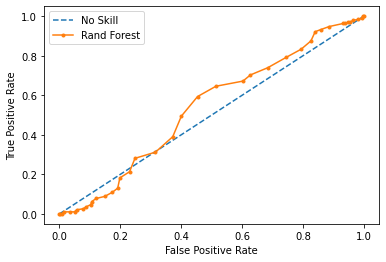

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       282
           1       0.33      0.01      0.02       192

    accuracy                           0.59       474
   macro avg       0.46      0.50      0.38       474
weighted avg       0.49      0.59      0.45       474

[[278   4]
 [190   2]]


In [97]:
Label = 'Labelb_M15_H1'

df_1  = df1_filt_b_M15_H1
df_2  = df2_filt_b_M15_H1
df_3  = df3_filt_b_M15_H1

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_b1 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_b1.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_b1, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_b1, X_test = X2, y_test = y2, thres = 0.5)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.722


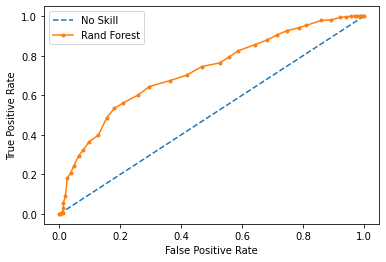

Predictions - Threshold >= 0.2
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       616
           1       0.35      1.00      0.52       326

    accuracy                           0.35       942
   macro avg       0.67      0.51      0.27       942
weighted avg       0.77      0.35      0.19       942

[[  7 609]
 [  0 326]]


In [98]:
Label = 'Labelb_M15_H1'

df_1  = df2_filt_b_M15_H1
df_2  = df3_filt_b_M15_H1
df_3  = df1_filt_b_M15_H1

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_b2 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_b2.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_b2, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_b2, X_test = X2, y_test = y2, thres = 0.2)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.391


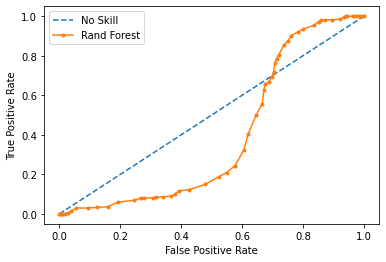

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.67      0.29      0.40       506
           1       0.42      0.79      0.55       335

    accuracy                           0.49       841
   macro avg       0.54      0.54      0.47       841
weighted avg       0.57      0.49      0.46       841

[[145 361]
 [ 72 263]]


In [99]:
Label = 'Labelb_M15_H1'

df_1  = df1_filt_b_M15_H1
df_2  = df3_filt_b_M15_H1
df_3  = df2_filt_b_M15_H1

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_b3 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_b3.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_b3, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_b3, X_test = X2, y_test = y2, thres = 0.5)

#### [M15_H1] BUY - Optimum RFC Model

The chosen model is rcf_b2 

In [100]:
# Load rfc_opt_b_H1 model
with open('rfc_opt_b_H1.pkl', 'rb') as f:
    rfc_opt_b_H1 = pickle.load(f)

In [101]:
#rfc_opt_b_H1 = rfc_b2

#### [M15_H1] BUY - Optimum model testing

In [102]:
def opt_thres(model, X_test1, y_test1, X_test2, y_test2, X_test3, y_test3, pr):
    
    from sklearn.metrics import accuracy_score, precision_score, average_precision_score
    
    for i in np.arange(0,1,0.02):
        
        predicted_proba1 = model.predict_proba(X_test1)
        predicted1 = (predicted_proba1 [:,1] >= i).astype('int')
        if precision_score(y_test1, predicted1) > pr:
            break
            
    print(i, precision_score(y_test1, predicted1))

    for j in np.arange(0,1,0.02):
        
        predicted_proba2 = model.predict_proba(X_test2)
        predicted2 = (predicted_proba2 [:,1] >= j).astype('int')
        if precision_score(y_test2, predicted2) > pr:
            break
            
    print(j, precision_score(y_test2, predicted2))

    for k in np.arange(0,1,0.02):
        
        predicted_proba3 = model.predict_proba(X_test3)
        predicted3 = (predicted_proba3 [:,1] >= k).astype('int')
        if precision_score(y_test3, predicted3) > pr:
            break
            
    print(k, precision_score(y_test3, predicted3))
    
    t = max(i,j,k)
    print ('Threshold:',t) 
            
    return t

0.46 0.5174129353233831
0.44 0.5159010600706714
0.34 0.5220125786163522
Threshold: 0.46
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.710


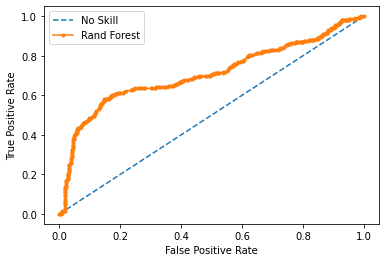

Predictions - Threshold >= 0.46
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       616
           1       0.52      0.64      0.57       326

    accuracy                           0.67       942
   macro avg       0.65      0.66      0.65       942
weighted avg       0.69      0.67      0.68       942

[[422 194]
 [118 208]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.579


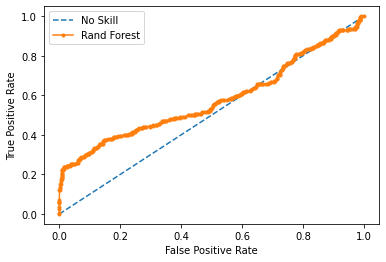

Predictions - Threshold >= 0.46
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       506
           1       0.55      0.40      0.46       335

    accuracy                           0.63       841
   macro avg       0.60      0.59      0.59       841
weighted avg       0.62      0.63      0.62       841

[[395 111]
 [201 134]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.845


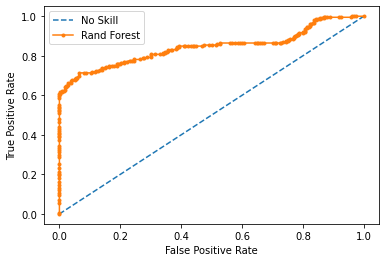

Predictions - Threshold >= 0.46
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       282
           1       0.76      0.75      0.75       192

    accuracy                           0.80       474
   macro avg       0.79      0.79      0.79       474
weighted avg       0.80      0.80      0.80       474

[[236  46]
 [ 48 144]]


In [103]:
# Test on remaining dataframes
Label = 'Labelb_M15_H1'

X1 = df1_filt_b_M15_H1.drop([Label],axis=1)
y1 = df1_filt_b_M15_H1[Label]

X2 = df2_filt_b_M15_H1.drop([Label],axis=1)
y2 = df2_filt_b_M15_H1[Label]

X3 = df3_filt_b_M15_H1.drop([Label],axis=1)
y3 = df3_filt_b_M15_H1[Label]

thres = opt_thres(rfc_opt_b_H1, X1, y1, X2, y2, X3, y3, pr = 0.5)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_b_H1, X1, y1)

# Predicts
t.predictions(rfc_opt_b_H1, X_test = X1, y_test = y1, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_b_H1, X2, y2)

# Predicts
t.predictions(rfc_opt_b_H1, X_test = X2, y_test = y2, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_b_H1, X3, y3)

# Predicts
t.predictions(rfc_opt_b_H1, X_test = X3, y_test = y3, thres = thres)

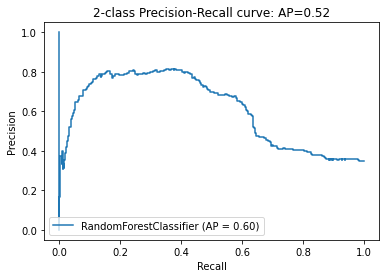

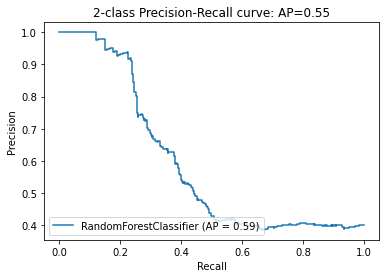

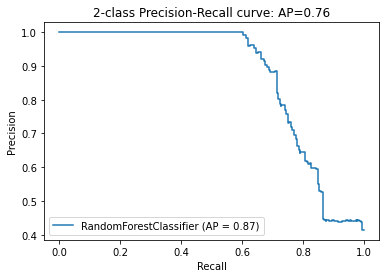

In [104]:
# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_b_H1, X1, y1, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_b_H1, X2, y2, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_b_H1, X3, y3, thres)

<AxesSubplot:>

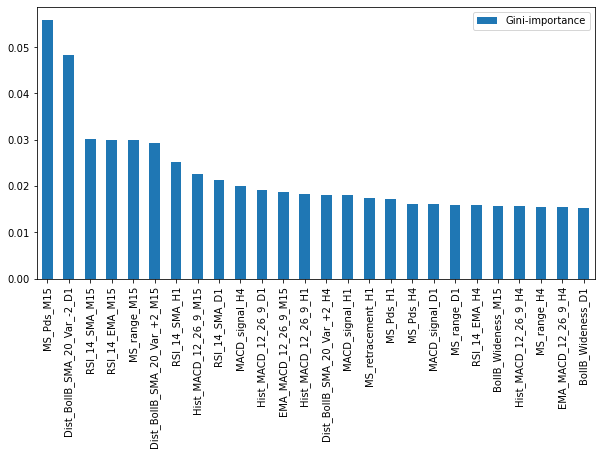

In [105]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X1.columns, rfc_opt_b_H1.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances[importances['Gini-importance'] > 0.015]
importances = importances.sort_values('Gini-importance',ascending=False)
importances.plot(kind='bar', stacked=True, figsize=(10,5))

#### [M15_H1] SELL - Explores Best RFC Model

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.393


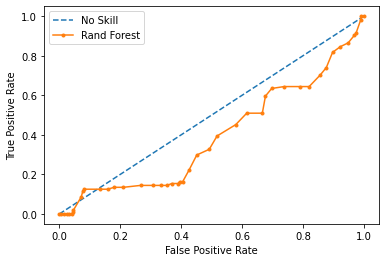

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.58      0.63      0.61       195
           1       0.18      0.15      0.17       104

    accuracy                           0.46       299
   macro avg       0.38      0.39      0.39       299
weighted avg       0.44      0.46      0.45       299

[[123  72]
 [ 88  16]]


In [106]:
Label = 'Labels_M15_H1'

df_1  = df1_filt_s_M15_H1
df_2  = df2_filt_s_M15_H1
df_3  = df3_filt_s_M15_H1

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_s1 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_s1.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_s1, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_s1, X_test = X2, y_test = y2, thres = 0.5)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.312


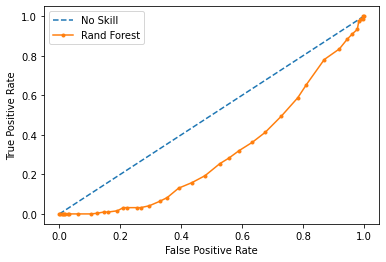

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       562
           1       0.21      0.25      0.23       315

    accuracy                           0.39       877
   macro avg       0.37      0.36      0.37       877
weighted avg       0.42      0.39      0.40       877

[[266 296]
 [235  80]]


In [107]:
Label = 'Labels_M15_H1'

df_1  = df2_filt_s_M15_H1
df_2  = df3_filt_s_M15_H1
df_3  = df1_filt_s_M15_H1

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_s2 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_s2.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_s2, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_s2, X_test = X2, y_test = y2, thres = 0.5)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.563


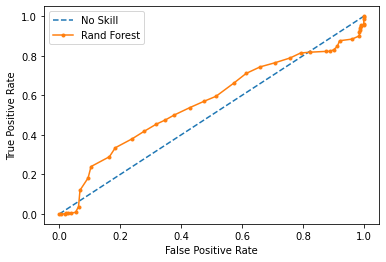

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.36      0.04      0.07       414
           1       0.35      0.88      0.50       242

    accuracy                           0.35       656
   macro avg       0.36      0.46      0.29       656
weighted avg       0.36      0.35      0.23       656

[[ 16 398]
 [ 28 214]]


In [108]:
Label = 'Labels_M15_H1'

df_1  = df1_filt_s_M15_H1
df_2  = df3_filt_s_M15_H1
df_3  = df2_filt_s_M15_H1

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_s3 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_s3.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_s3, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_s3, X_test = X2, y_test = y2, thres = 0.5)

#### [M15_H1] SELL - Optimum RFC Model

The chosen model is rcf_s3 

In [109]:
# Load rfc_opt_s_H1 model
with open('rfc_opt_s_H1.pkl', 'rb') as f:
    rfc_opt_s_H1 = pickle.load(f)

In [110]:
#rfc_opt_s_H1 = rfc_s3

#### [M15_H1] SELL - Optimum model testing

0.6 0.5544041450777202
0.64 0.540084388185654
0.6 0.52046783625731
Threshold: 0.64
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.750


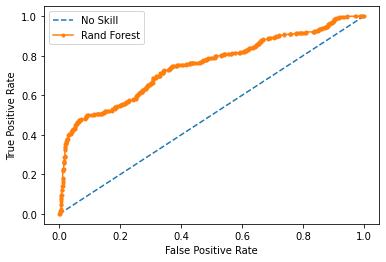

Predictions - Threshold >= 0.64
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       562
           1       0.69      0.51      0.59       315

    accuracy                           0.74       877
   macro avg       0.73      0.69      0.70       877
weighted avg       0.74      0.74      0.73       877

[[491  71]
 [155 160]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.638


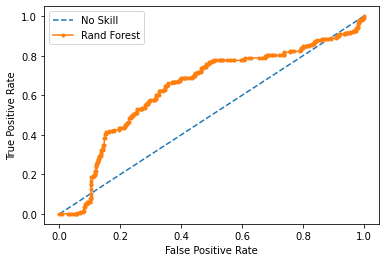

Predictions - Threshold >= 0.64
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       414
           1       0.54      0.53      0.53       242

    accuracy                           0.66       656
   macro avg       0.63      0.63      0.63       656
weighted avg       0.66      0.66      0.66       656

[[305 109]
 [114 128]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.765


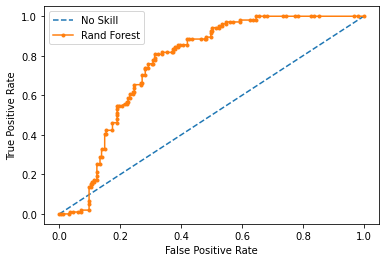

Predictions - Threshold >= 0.64
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       195
           1       0.57      0.56      0.57       104

    accuracy                           0.70       299
   macro avg       0.67      0.67      0.67       299
weighted avg       0.70      0.70      0.70       299

[[152  43]
 [ 46  58]]


In [111]:
# Test on remaining dataframes
Label = 'Labels_M15_H1'

X1 = df1_filt_s_M15_H1.drop([Label],axis=1)
y1 = df1_filt_s_M15_H1[Label]

X2 = df2_filt_s_M15_H1.drop([Label],axis=1)
y2 = df2_filt_s_M15_H1[Label]

X3 = df3_filt_s_M15_H1.drop([Label],axis=1)
y3 = df3_filt_s_M15_H1[Label]

thres = opt_thres(rfc_opt_s_H1, X1, y1, X2, y2, X3, y3, pr = 0.5)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_s_H1, X1, y1)

# Predicts
t.predictions(rfc_opt_s_H1, X_test = X1, y_test = y1, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_s_H1, X2, y2)

# Predicts
t.predictions(rfc_opt_s_H1, X_test = X2, y_test = y2, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_s_H1, X3, y3)

# Predicts
t.predictions(rfc_opt_s_H1, X_test = X3, y_test = y3, thres = thres)

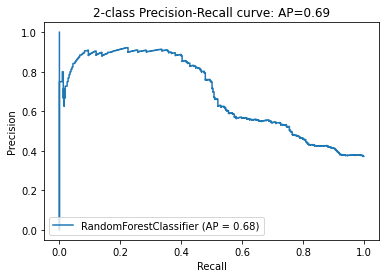

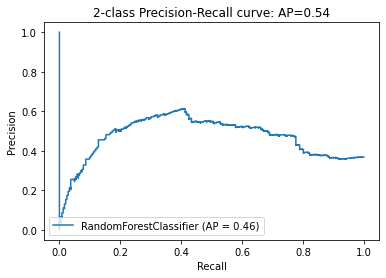

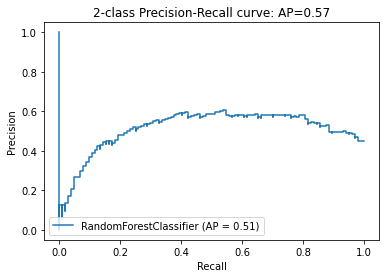

In [112]:
# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_s_H1, X1, y1, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_s_H1, X2, y2, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_s_H1, X3, y3, thres)

<AxesSubplot:>

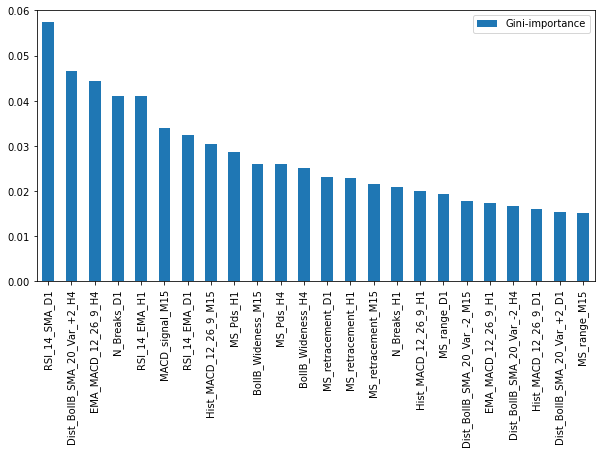

In [113]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X1.columns, rfc_opt_s_H1.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances[importances['Gini-importance'] > 0.015]
importances = importances.sort_values('Gini-importance',ascending=False)
importances.plot(kind='bar', stacked=True, figsize=(10,5))

#### [M15_H4] BUY - Explores Best RFC Model

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.761


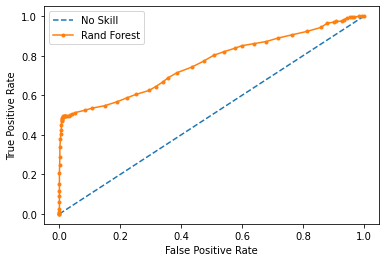

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1411
           1       0.98      0.49      0.65      1548

    accuracy                           0.73      2959
   macro avg       0.81      0.74      0.72      2959
weighted avg       0.82      0.73      0.71      2959

[[1396   15]
 [ 787  761]]


In [114]:
Label = 'Labelb_M15_H4'

df_1  = df1_filt_b_M15_H4
df_2  = df2_filt_b_M15_H4
df_3  = df3_filt_b_M15_H4

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_b1 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_b1.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_b1, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_b1, X_test = X2, y_test = y2, thres = 0.5)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.380


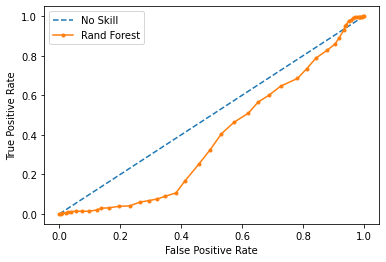

Predictions - Threshold >= 0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1097
           1       0.32      1.00      0.49       518

    accuracy                           0.32      1615
   macro avg       0.16      0.50      0.24      1615
weighted avg       0.10      0.32      0.16      1615

[[   0 1097]
 [   0  518]]


C:\Users\Rodrigo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [115]:
Label = 'Labelb_M15_H4'

df_1  = df2_filt_b_M15_H4
df_2  = df3_filt_b_M15_H4
df_3  = df1_filt_b_M15_H4

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_b2 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_b2.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_b2, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_b2, X_test = X2, y_test = y2, thres = 0.2)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.973


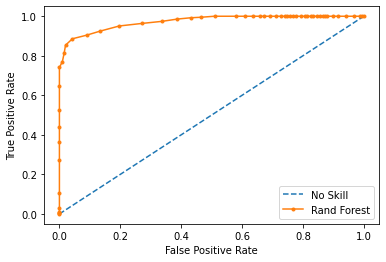

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       1.00      0.39      0.56      1738
           1       0.42      1.00      0.59       772

    accuracy                           0.58      2510
   macro avg       0.71      0.69      0.58      2510
weighted avg       0.82      0.58      0.57      2510

[[ 676 1062]
 [   0  772]]


In [116]:
Label = 'Labelb_M15_H4'

df_1  = df1_filt_b_M15_H4
df_2  = df3_filt_b_M15_H4
df_3  = df2_filt_b_M15_H4

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_b3 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_b3.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_b3, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_b3, X_test = X2, y_test = y2, thres = 0.5)

#### [M15_H4] BUY - Optimum RFC Model

The chosen model is rcf_b3 

In [117]:
# Load rfc_opt_b_H4 model
with open('rfc_opt_b_H4.pkl', 'rb') as f:
    rfc_opt_b_H4 = pickle.load(f)

In [118]:
#rfc_opt_b_H4 = rfc_b3

#### [M15_H4] BUY - Optimum model testing

0.24 0.5103448275862069
0.56 0.5597691673536686
0.0 0.5231497127407908
Threshold: 0.56
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.998


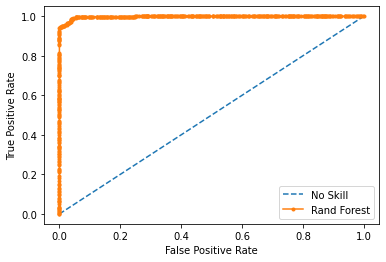

Predictions - Threshold >= 0.56
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1097
           1       0.99      0.94      0.97       518

    accuracy                           0.98      1615
   macro avg       0.98      0.97      0.98      1615
weighted avg       0.98      0.98      0.98      1615

[[1094    3]
 [  30  488]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.831


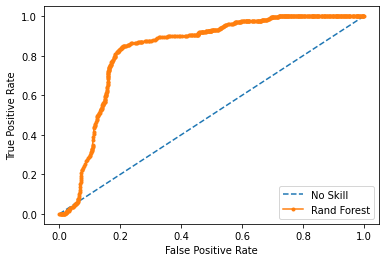

Predictions - Threshold >= 0.56
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1738
           1       0.56      0.88      0.68       772

    accuracy                           0.75      2510
   macro avg       0.74      0.79      0.74      2510
weighted avg       0.81      0.75      0.76      2510

[[1204  534]
 [  93  679]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.907


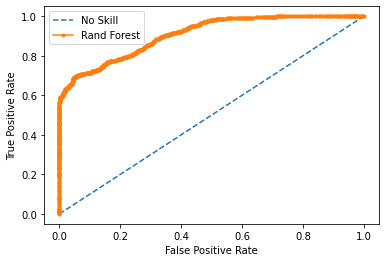

Predictions - Threshold >= 0.56
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      1411
           1       0.99      0.59      0.74      1548

    accuracy                           0.78      2959
   macro avg       0.84      0.79      0.78      2959
weighted avg       0.85      0.78      0.78      2959

[[1406    5]
 [ 636  912]]


In [119]:
# Test on remaining dataframes
Label = 'Labelb_M15_H4'

X1 = df1_filt_b_M15_H4.drop([Label],axis=1)
y1 = df1_filt_b_M15_H4[Label]

X2 = df2_filt_b_M15_H4.drop([Label],axis=1)
y2 = df2_filt_b_M15_H4[Label]

X3 = df3_filt_b_M15_H4.drop([Label],axis=1)
y3 = df3_filt_b_M15_H4[Label]

thres = opt_thres(rfc_opt_b_H4, X1, y1, X2, y2, X3, y3, pr = 0.5)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_b_H4, X1, y1)

# Predicts
t.predictions(rfc_opt_b_H4, X_test = X1, y_test = y1, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_b_H4, X2, y2)

# Predicts
t.predictions(rfc_opt_b_H4, X_test = X2, y_test = y2, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_b_H4, X3, y3)

# Predicts
t.predictions(rfc_opt_b_H4, X_test = X3, y_test = y3, thres = thres)

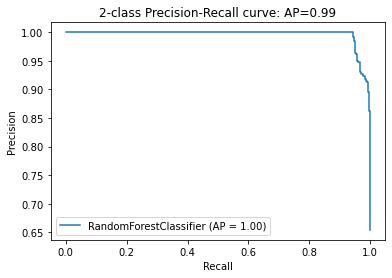

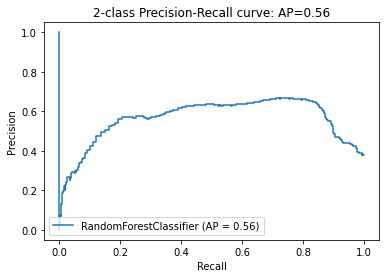

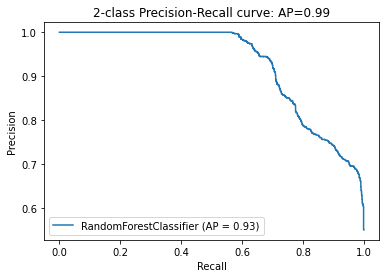

In [120]:
# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_b_H4, X1, y1, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_b_H4, X2, y2, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_b_H4, X3, y3, thres)

<AxesSubplot:>

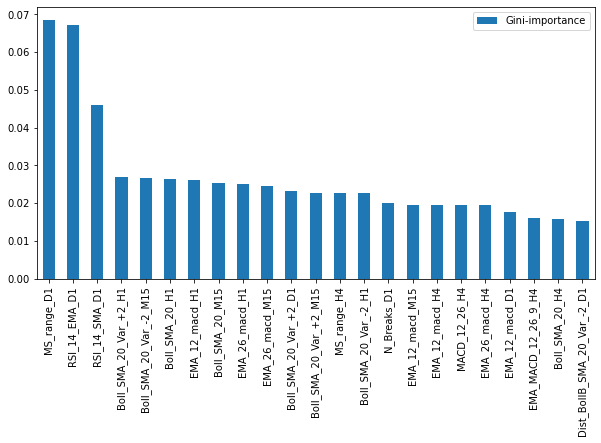

In [121]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X1.columns, rfc_opt_b_H4.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances[importances['Gini-importance'] > 0.015]
importances = importances.sort_values('Gini-importance',ascending=False)
importances.plot(kind='bar', stacked=True, figsize=(10,5))

#### [M15_H4] SELL - Explores Best RFC Model

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.343


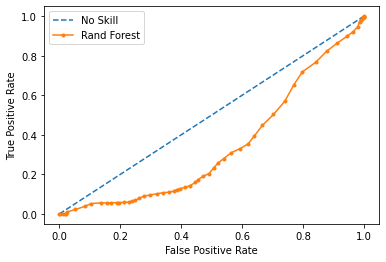

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.59      0.26      0.36      2926
           1       0.25      0.57      0.34      1238

    accuracy                           0.35      4164
   macro avg       0.42      0.41      0.35      4164
weighted avg       0.49      0.35      0.36      4164

[[ 759 2167]
 [ 532  706]]


In [122]:
Label = 'Labels_M15_H4'

df_1  = df1_filt_s_M15_H4
df_2  = df2_filt_s_M15_H4
df_3  = df3_filt_s_M15_H4

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_s1 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_s1.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_s1, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_s1, X_test = X2, y_test = y2, thres = 0.5)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.870


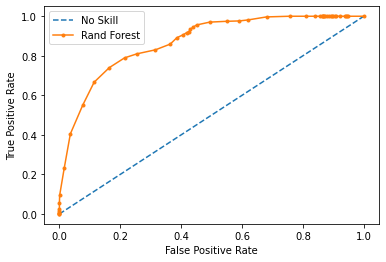

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1280
           1       1.00      0.03      0.05      1178

    accuracy                           0.53      2458
   macro avg       0.76      0.51      0.37      2458
weighted avg       0.75      0.53      0.38      2458

[[1280    0]
 [1147   31]]


In [123]:
Label = 'Labels_M15_H4'

df_1  = df2_filt_s_M15_H4
df_2  = df3_filt_s_M15_H4
df_3  = df1_filt_s_M15_H4

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_s2 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_s2.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_s2, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_s2, X_test = X2, y_test = y2, thres = 0.5)

No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.793


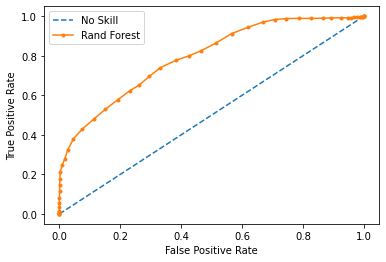

Predictions - Threshold >= 0.5
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      6131
           1       0.99      0.15      0.26      3440

    accuracy                           0.69      9571
   macro avg       0.83      0.57      0.53      9571
weighted avg       0.79      0.69      0.61      9571

[[6126    5]
 [2936  504]]


In [124]:
Label = 'Labels_M15_H4'

df_1  = df1_filt_s_M15_H4
df_2  = df3_filt_s_M15_H4
df_3  = df2_filt_s_M15_H4

# Concatenates df_1 & df_2 as X and y, and splits the data in train - test. We validate afterwards with df_3
X_train, X_test, y_train, y_test, X2, y2 = t.split(df_1,df_2,df_3,Label)

# Instantiates the model
rfc_s3 = RandomForestClassifier()
    
# Fit the model of df_1 & df_2 split
rfc_s3.fit(X_train,y_train)

# Plots the ROC curve
t.roc(rfc_s3, X2, y2)

# Predicts the df_3 df using the rfc model created from df_1 & df_2
t.predictions(rfc_s3, X_test = X2, y_test = y2, thres = 0.5)

#### [M15_H4] SELL - Optimum RFC Model

The chosen model is rcf_s3 

In [125]:
# Load rfc_opt_s_H4 model
with open('rfc_opt_s_H4.pkl', 'rb') as f:
    rfc_opt_s_H4 = pickle.load(f)

In [126]:
#rfc_opt_s_H1 = rfc_s3

#### [M15_H4] SELL - Optimum model testing

0.04 0.5612196283944736
0.22 0.5504201680672269
0.12 0.5267011197243755
Threshold: 0.22
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.991


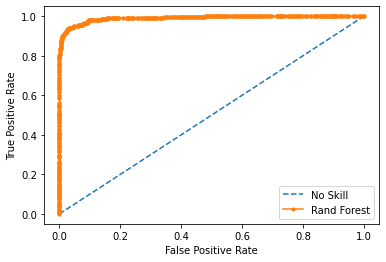

Predictions - Threshold >= 0.22
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1280
           1       0.86      0.99      0.92      1178

    accuracy                           0.91      2458
   macro avg       0.92      0.92      0.91      2458
weighted avg       0.92      0.91      0.91      2458

[[1086  194]
 [  15 1163]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.836


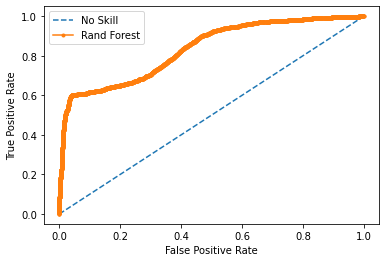

Predictions - Threshold >= 0.22
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      6131
           1       0.55      0.76      0.64      3440

    accuracy                           0.69      9571
   macro avg       0.69      0.71      0.68      9571
weighted avg       0.73      0.69      0.70      9571

[[3991 2140]
 [ 820 2620]]
No Skill   : ROC AUC=0.500
Rand Forest: ROC AUC=0.955


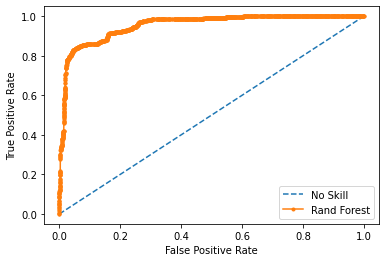

Predictions - Threshold >= 0.22
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2926
           1       0.69      0.91      0.79      1238

    accuracy                           0.85      4164
   macro avg       0.82      0.87      0.84      4164
weighted avg       0.88      0.85      0.86      4164

[[2415  511]
 [ 106 1132]]


In [127]:
# Test on remaining dataframes
Label = 'Labels_M15_H4'

X1 = df1_filt_s_M15_H4.drop([Label],axis=1)
y1 = df1_filt_s_M15_H4[Label]

X2 = df2_filt_s_M15_H4.drop([Label],axis=1)
y2 = df2_filt_s_M15_H4[Label]

X3 = df3_filt_s_M15_H4.drop([Label],axis=1)
y3 = df3_filt_s_M15_H4[Label]

thres = opt_thres(rfc_opt_s_H4, X1, y1, X2, y2, X3, y3, pr = 0.5)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_s_H4, X1, y1)

# Predicts
t.predictions(rfc_opt_s_H4, X_test = X1, y_test = y1, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_s_H4, X2, y2)

# Predicts
t.predictions(rfc_opt_s_H4, X_test = X2, y_test = y2, thres = thres)

# Displays the ROC curve (Receiver Operating Characteristic)
t.roc(rfc_opt_s_H4, X3, y3)

# Predicts
t.predictions(rfc_opt_s_H4, X_test = X3, y_test = y3, thres = thres)

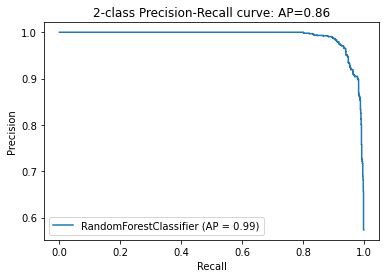

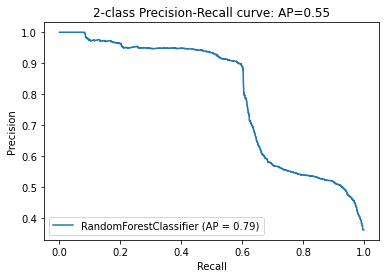

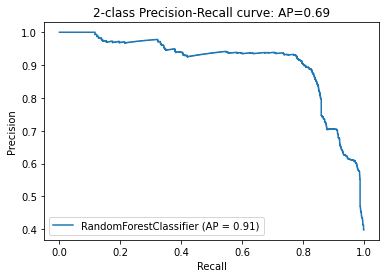

In [128]:
# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_s_H4, X1, y1, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_s_H4, X2, y2, thres)

# Displays the Precision - Recall curve
t.Pre_rec_curve(rfc_opt_s_H4, X3, y3, thres)

<AxesSubplot:>

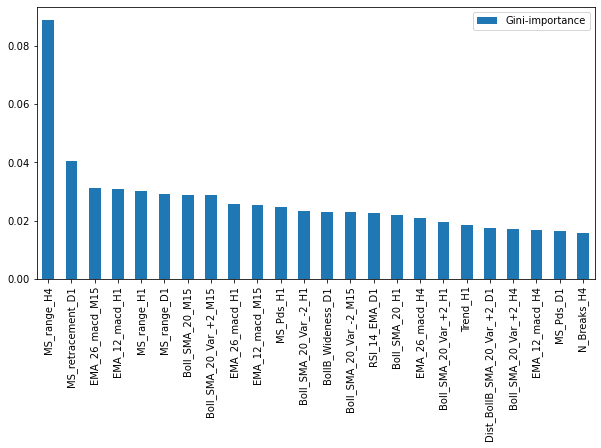

In [130]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X1.columns, rfc_opt_s_H4.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances[importances['Gini-importance'] > 0.015]
importances = importances.sort_values('Gini-importance',ascending=False)
importances.plot(kind='bar', stacked=True, figsize=(10,5))